##### <font color = 'purple'> TIME SERIES ANALYSIS FOR ENERGY CONSUMPTION WITH MODELING AND FORECASTING THE ENERGY CONSUMPTION

##### <font color = 'green'> Time Series Forecasting for 1D features

In [1]:
import os
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Time_Series_Analysis_Projects\\Energy_Consumption_Forecast_Project\\notebooks'

###### <font color = 'grey'> Define the path to the project folders

In [2]:
main = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Time_Series_Analysis_Projects\\Energy_Consumption_Forecast_Project'
data = '../data'
model = '../models'
notebk = '../notebooks'
output = '../outputs'
resource = '../resources'
visual = '../visuals'

###### <font color = 'grey'> Import the self-built customizable machine learning modules end-end

In [3]:
os.chdir(resource)

In [4]:
import olanrewaju as ol

In [5]:
dir(ol)

['LabelEncoder',
 'LogisticRegression',
 'MinMaxScaler',
 'Normalizer',
 'OneHotEncoder',
 'OrdinalEncoder',
 'RFE',
 'RandomForestClassifier',
 'StandardScaler',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__warningregistry__',
 'all_num_transform',
 'categorical_data',
 'change_dtype_function',
 'check_wrong_label',
 'concat_df',
 'convert_rfe_features_to_dataframe',
 'dataframe_describe',
 'dataframe_explore',
 'date_to_datetime_format',
 'datetime',
 'dropping_columns',
 'duplicate_corrector',
 'feature_selection_rfe',
 'feature_target_selector',
 'file_copy_v2',
 'file_image_saver_versioning_v1',
 'file_load_v4',
 'get_dummy_encoder',
 'joblib',
 'label_encoding',
 'merging_rfe_df',
 'min_max_scaler',
 'mislabel_function_corrector_v2',
 'missing_and_duplicate_checker',
 'missing_value_corrector_v2',
 'norm_scaler',
 'np',
 'numerical_data',
 'one_hot_encoding',
 'ordinal_encoding',
 'os',
 'outliers_correction

In [6]:
os.chdir(notebk)
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Time_Series_Analysis_Projects\\Energy_Consumption_Forecast_Project\\notebooks'

###### <font color = 'grey'> Import the necessary libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time
from datetime import datetime

###### <font color = 'grey'> Load the data

In [8]:
os.chdir(data)

In [9]:
data = pd.read_csv('Energy_Consumption.csv')
data.head()

,Date,Period,OperationalLessIndustrial,Industrial
0,37257,1,3535.867064,1086.132936
1,37257,2,3383.499028,1088.500972
2,37257,3,3655.527552,1084.472448
3,37257,4,3510.446636,1085.553364
4,37257,5,3294.697156,1081.302844


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230784 entries, 0 to 230783
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       230784 non-null  int64  
 1   Period                     230784 non-null  int64  
 2   OperationalLessIndustrial  230736 non-null  float64
 3   Industrial                 230736 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 7.0 MB


In [11]:
data.describe()

,Date,Period,OperationalLessIndustrial,Industrial
count,230784.000000,230784.000000,230736.000000,230736.000000
mean,39660.500000,24.500000,4638.962960,1133.089038
std,1387.953024,13.853429,836.369503,115.111743
min,37257.000000,1.000000,2688.516606,211.237656
25%,38458.750000,12.750000,3975.539745,1088.569214
50%,39660.500000,24.500000,4573.124873,1155.148966
75%,40862.250000,36.250000,5233.421258,1209.366814
max,42064.000000,48.000000,9494.010992,1421.442200


In [12]:
data.shape

(230784, 4)

###### <font color = 'grey'> Selecting the column we want to work with

In [13]:
df = data.copy()

In [14]:
df_ops = df.drop(columns=['Industrial'])
df_ind = df.drop(columns=['OperationalLessIndustrial'])

##### <font color = 'green'> Analyze the df_ops data

###### <font color = 'purple'> Starting the analysis with df_ops data

In [15]:
df_ops

,Date,Period,OperationalLessIndustrial
0,37257,1,3535.867064
1,37257,2,3383.499028
2,37257,3,3655.527552
3,37257,4,3510.446636
4,37257,5,3294.697156
...,...,...,...
230779,42064,44,NaN
230780,42064,45,NaN
230781,42064,46,NaN
230782,42064,47,NaN


###### <font color = 'grey'> Transform the Date column from epoch to a standard date format

In [16]:
df_ops['date_transformed'] = df_ops.Date.apply(lambda x: pd.Timestamp('1899-12-31') + pd.Timedelta(x, unit='days'))

In [17]:
df_ops

,Date,Period,OperationalLessIndustrial,date_transformed
0,37257,1,3535.867064,2002-01-02
1,37257,2,3383.499028,2002-01-02
2,37257,3,3655.527552,2002-01-02
3,37257,4,3510.446636,2002-01-02
4,37257,5,3294.697156,2002-01-02
...,...,...,...,...
230779,42064,44,NaN,2015-03-02
230780,42064,45,NaN,2015-03-02
230781,42064,46,NaN,2015-03-02
230782,42064,47,NaN,2015-03-02


The new table shows the date in days and since the period are given in 30 minutes interval we need to reflect that in the data so that the 30 minute interval is reflected.

###### <font color = 'grey'> Transform the 'date_transformed' columns to include the 30 minutes interval in the data - Accounting for the measurement cycle in our data

In [18]:
df_ops['date-time'] = df_ops['date_transformed'] + pd.to_timedelta((df_ops['Period'] - 1) * 30, unit='m')
df_ops

,Date,Period,OperationalLessIndustrial,date_transformed,date-time
0,37257,1,3535.867064,2002-01-02,2002-01-02 00:00:00
1,37257,2,3383.499028,2002-01-02,2002-01-02 00:30:00
2,37257,3,3655.527552,2002-01-02,2002-01-02 01:00:00
3,37257,4,3510.446636,2002-01-02,2002-01-02 01:30:00
4,37257,5,3294.697156,2002-01-02,2002-01-02 02:00:00
...,...,...,...,...,...
230779,42064,44,NaN,2015-03-02,2015-03-02 21:30:00
230780,42064,45,NaN,2015-03-02,2015-03-02 22:00:00
230781,42064,46,NaN,2015-03-02,2015-03-02 22:30:00
230782,42064,47,NaN,2015-03-02,2015-03-02 23:00:00


###### <font color = 'grey'> Select columns for the Analysis

In [19]:
df_ops_used = df_ops[['OperationalLessIndustrial', 'date-time']]
df_ops_used

,OperationalLessIndustrial,date-time
0,3535.867064,2002-01-02 00:00:00
1,3383.499028,2002-01-02 00:30:00
2,3655.527552,2002-01-02 01:00:00
3,3510.446636,2002-01-02 01:30:00
4,3294.697156,2002-01-02 02:00:00
...,...,...
230779,NaN,2015-03-02 21:30:00
230780,NaN,2015-03-02 22:00:00
230781,NaN,2015-03-02 22:30:00
230782,NaN,2015-03-02 23:00:00


In [20]:
df_ops_used.isnull().sum()

OperationalLessIndustrial    48
date-time                     0
dtype: int64

In [21]:
df_ops_used.duplicated().sum()

0

###### <font color = 'grey'> Removing Missing Values from df_ops_used

In [22]:
help(ol.missing_value_corrector_v2)

Help on function missing_value_corrector_v2 in module olanrewaju:

missing_value_corrector_v2(file)
    This function scan through a given dataset and correct the missing values in them.
    It check for the data type in each columns of the dataset. If the column is numerical, it checks whether the dtype is either float or int,
       it uses this dtype to correct for missing values using the mean strategy.
    If the column is categorical, it checks to see that the dtype is an object and correct the missing values using the mode strategy.
    This function is completely iterative.

    Input:
        file: This is the pandas dataframe.

    Output:
        The function return a cleaned dataframe without missing values.



In [23]:
file = df_ops_used
df_ops_clean = ol.missing_value_corrector_v2(file)

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Time_Series_Analysis_Projects\Energy_Consumption_Forecast_Project\resources\olanrewaju.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file[col] = file[col].fillna(file[col].mean())


In [24]:
df_ops_clean

,OperationalLessIndustrial,date-time
0,3535.867064,2002-01-02 00:00:00
1,3383.499028,2002-01-02 00:30:00
2,3655.527552,2002-01-02 01:00:00
3,3510.446636,2002-01-02 01:30:00
4,3294.697156,2002-01-02 02:00:00
...,...,...
230779,4638.962960,2015-03-02 21:30:00
230780,4638.962960,2015-03-02 22:00:00
230781,4638.962960,2015-03-02 22:30:00
230782,4638.962960,2015-03-02 23:00:00


###### <font color = 'grey'> Renaming the columns

In [25]:
df_ops_clean.columns = ['energy_demand', 'date-time-interval']
df_ops_clean

,energy_demand,date-time-interval
0,3535.867064,2002-01-02 00:00:00
1,3383.499028,2002-01-02 00:30:00
2,3655.527552,2002-01-02 01:00:00
3,3510.446636,2002-01-02 01:30:00
4,3294.697156,2002-01-02 02:00:00
...,...,...
230779,4638.962960,2015-03-02 21:30:00
230780,4638.962960,2015-03-02 22:00:00
230781,4638.962960,2015-03-02 22:30:00
230782,4638.962960,2015-03-02 23:00:00


###### <font color = 'grey'> **In time series analysis, always make sure you change the data index column to the transformed date-time-interval column.**
If the index is not sorted, befroe converting, you will need to sort or reset_index

###### <font color = 'grey'> Convert date-time-interval column to the index column of time series data

In [26]:
df_ops_clean = df_ops_clean.set_index('date-time-interval')
df_ops_clean

,energy_demand
date-time-interval,
2002-01-02 00:00:00,3535.867064
2002-01-02 00:30:00,3383.499028
2002-01-02 01:00:00,3655.527552
2002-01-02 01:30:00,3510.446636
2002-01-02 02:00:00,3294.697156
...,...
2015-03-02 21:30:00,4638.962960
2015-03-02 22:00:00,4638.962960
2015-03-02 22:30:00,4638.962960


###### <font color = 'green'> Correcting the Inconsistence in data for time series

###### <font color = 'grey'> Resample the data to 1 hour intervals

In [27]:
df_ops_clean = df_ops_clean.resample('h')
df_ops_clean

In [28]:
len(df_ops_clean)

115392

###### <font color = 'grey'> Aggregate the resample 1 hour interval data

In [29]:
df_ops_clean = df_ops_clean.agg({'energy_demand':'sum'})
df_ops_clean

,energy_demand
date-time-interval,
2002-01-02 00:00:00,6919.366092
2002-01-02 01:00:00,7165.974188
2002-01-02 02:00:00,6406.542994
2002-01-02 03:00:00,5815.537828
2002-01-02 04:00:00,5497.732922
...,...
2015-03-02 19:00:00,9277.925921
2015-03-02 20:00:00,9277.925921
2015-03-02 21:00:00,9277.925921


##### <font color = 'purple'> Seasonality and Trends

In [30]:
# Get the Starting period

df_ops_clean.index.min()

Timestamp('2002-01-02 00:00:00')

In [31]:
# Get the Ending period

df_ops_clean.index.max()

Timestamp('2015-03-02 23:00:00')

###### <font color = 'purple'> Plot Seasonality by Day

In [32]:
hour = df_ops_clean.index.hour
hour

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype='int32', name='date-time-interval', length=115392)

###### <font color = 'purple'> The Trend

In [33]:
help(ol.file_image_saver_versioning_v1)

Help on function file_image_saver_versioning_v1 in module olanrewaju:

file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)
    This function saves a pandas dataframe into a csv or excel format and also saves an image to different format with versioning using date.
    Inputs:
        main_dir: This is the parent folder for the project.
        file_name: This is the name of the data or image you want to save, written without string.
        dest_path: This is the folder name you want to save the data or image written as string.
        save_name: This is the string name you want your data or image to be save_as in your folder.
        ext: This is the format of the data if it is csv or excel or png, jpeg etc for images. It must have the '.' along with it.
    Output:
        This function will save the data or image in the specified folder respectively with a date versioning.
        You will need to check the folder specified to see if the data or image is s

The file is trend_for_daily_energy_consumption and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Time_Series_Analysis_Projects\Energy_Consumption_Forecast_Project/visuals folder


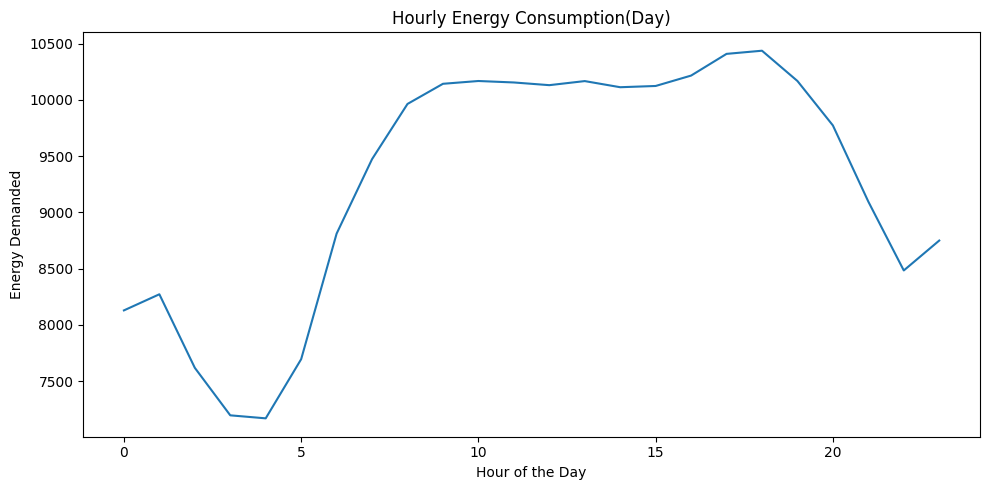

In [34]:
df_ops_clean.groupby(hour).mean(numeric_only=True)['energy_demand'].plot(figsize=(10, 5))
plt.title('Hourly Energy Consumption(Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Demanded')
plt.tight_layout()

main_dir = main
file_name = df_ops_clean
dest_path = 'visuals'
save_name = 'trend_for_daily_energy_consumption'
ext = '.png'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

###### <font color = 'purple'> Seasonality by day of the week

In [35]:
dayofweek = df_ops_clean.index.dayofweek
dayofweek

Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       ...
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype='int32', name='date-time-interval', length=115392)

The file is trend_for_weekly_energy_consumption and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Time_Series_Analysis_Projects\Energy_Consumption_Forecast_Project/visuals folder


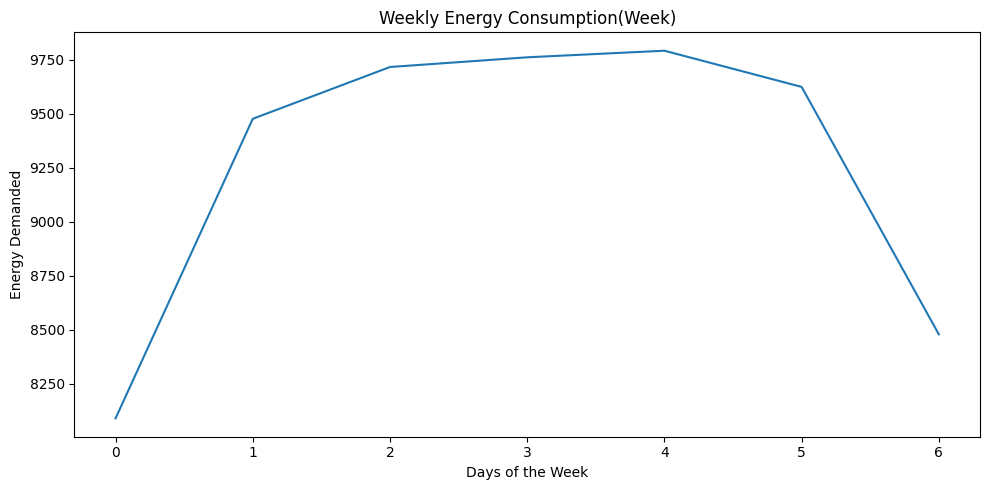

In [37]:
df_ops_clean.groupby(dayofweek).mean(numeric_only=True)['energy_demand'].plot(figsize=(10, 5))
plt.title('Weekly Energy Consumption(Week)')
plt.xlabel('Days of the Week')
plt.ylabel('Energy Demanded')
plt.tight_layout()

main_dir = main
file_name = df_ops_clean
dest_path = 'visuals'
save_name = 'trend_for_weekly_energy_consumption'
ext = '.png'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

###### <font color = 'purple'> Seasonality by Month of the year

In [38]:
month = df_ops_clean.index.month
month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype='int32', name='date-time-interval', length=115392)

The file is trend_for_monthly_energy_consumption and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Time_Series_Analysis_Projects\Energy_Consumption_Forecast_Project/visuals folder


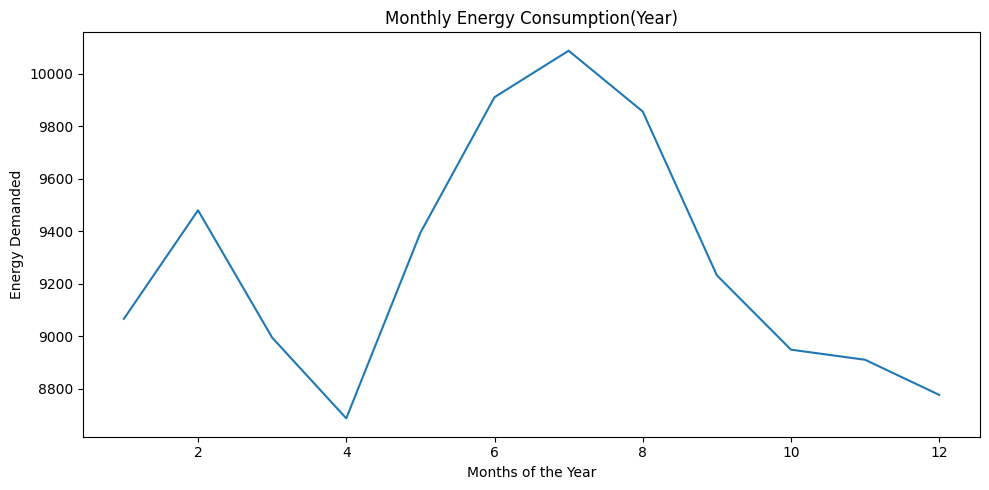

In [39]:
df_ops_clean.groupby(month).mean(numeric_only=True)['energy_demand'].plot(figsize=(10, 5))
plt.title('Monthly Energy Consumption(Year)')
plt.xlabel('Months of the Year')
plt.ylabel('Energy Demanded')
plt.tight_layout()

main_dir = main
file_name = df_ops_clean
dest_path = 'visuals'
save_name = 'trend_for_monthly_energy_consumption'
ext = '.png'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

#### <font color = 'purple'> Working with the 'Industrial' Column for the data

In [40]:
df_ind

,Date,Period,Industrial
0,37257,1,1086.132936
1,37257,2,1088.500972
2,37257,3,1084.472448
3,37257,4,1085.553364
4,37257,5,1081.302844
...,...,...,...
230779,42064,44,NaN
230780,42064,45,NaN
230781,42064,46,NaN
230782,42064,47,NaN


###### <font color = 'grey'> Transform the 'Date' column from epoch to standard date format

In [41]:
df_ind['date_transformed'] = df_ind.Date.apply(lambda x: pd.Timestamp('1899-12-31') + pd.Timedelta(x, unit='days'))
df_ind

,Date,Period,Industrial,date_transformed
0,37257,1,1086.132936,2002-01-02
1,37257,2,1088.500972,2002-01-02
2,37257,3,1084.472448,2002-01-02
3,37257,4,1085.553364,2002-01-02
4,37257,5,1081.302844,2002-01-02
...,...,...,...,...
230779,42064,44,NaN,2015-03-02
230780,42064,45,NaN,2015-03-02
230781,42064,46,NaN,2015-03-02
230782,42064,47,NaN,2015-03-02


###### **The new table shows the date in days and since the period are given in 30 minutes interval we need to reflect that in the data so that the 30 minute interval is reflected.**

###### <font color = 'grey'> Extract the year, dayofweek, month and quarter from the 'date_transformed'

In [42]:
df_ind['year'] = df_ind['date_transformed'].dt.year
df_ind['day_of_the_week'] = df_ind['date_transformed'].dt.strftime('%A')
df_ind['month'] = df_ind['date_transformed'].dt.weekday.map(
    {1: 'January', 2: 'February', 3: 'March',
     4: 'April', 5: 'May', 6: 'June',
     7: 'July', 8: 'August', 9: 'September',
     10: 'October', 11: 'November', 12: 'December'}
)
df_ind['quarter'] = df_ind['date_transformed'].dt.quarter.map({1: '1st_qtr', 2: '2nd_qtr', 3: '3rd_qtr', 4: '4th_qtr'})

In [43]:
df_ind

,Date,Period,Industrial,date_transformed,year,day_of_the_week,month,quarter
0,37257,1,1086.132936,2002-01-02,2002,Wednesday,February,1st_qtr
1,37257,2,1088.500972,2002-01-02,2002,Wednesday,February,1st_qtr
2,37257,3,1084.472448,2002-01-02,2002,Wednesday,February,1st_qtr
3,37257,4,1085.553364,2002-01-02,2002,Wednesday,February,1st_qtr
4,37257,5,1081.302844,2002-01-02,2002,Wednesday,February,1st_qtr
...,...,...,...,...,...,...,...,...
230779,42064,44,NaN,2015-03-02,2015,Monday,NaN,1st_qtr
230780,42064,45,NaN,2015-03-02,2015,Monday,NaN,1st_qtr
230781,42064,46,NaN,2015-03-02,2015,Monday,NaN,1st_qtr
230782,42064,47,NaN,2015-03-02,2015,Monday,NaN,1st_qtr


###### <font color = 'grey'> Transform the 'date_transformed' columns to include the 30 minutes interval in the data - Accounting for the measurement cycle in our data

In [44]:
df_ind['date-time'] = df_ind['date_transformed'] + pd.to_timedelta((df_ind['Period'] - 1) * 30, unit='m')
df_ind

,Date,Period,Industrial,date_transformed,year,day_of_the_week,month,quarter,date-time
0,37257,1,1086.132936,2002-01-02,2002,Wednesday,February,1st_qtr,2002-01-02 00:00:00
1,37257,2,1088.500972,2002-01-02,2002,Wednesday,February,1st_qtr,2002-01-02 00:30:00
2,37257,3,1084.472448,2002-01-02,2002,Wednesday,February,1st_qtr,2002-01-02 01:00:00
3,37257,4,1085.553364,2002-01-02,2002,Wednesday,February,1st_qtr,2002-01-02 01:30:00
4,37257,5,1081.302844,2002-01-02,2002,Wednesday,February,1st_qtr,2002-01-02 02:00:00
...,...,...,...,...,...,...,...,...,...
230779,42064,44,NaN,2015-03-02,2015,Monday,NaN,1st_qtr,2015-03-02 21:30:00
230780,42064,45,NaN,2015-03-02,2015,Monday,NaN,1st_qtr,2015-03-02 22:00:00
230781,42064,46,NaN,2015-03-02,2015,Monday,NaN,1st_qtr,2015-03-02 22:30:00
230782,42064,47,NaN,2015-03-02,2015,Monday,NaN,1st_qtr,2015-03-02 23:00:00


###### <font coor = 'grey'> Select columns for Analysis

In [45]:
df_ind_used = df_ind[['date-time', 'Industrial']]
df_ind_used.head()

,date-time,Industrial
0,2002-01-02 00:00:00,1086.132936
1,2002-01-02 00:30:00,1088.500972
2,2002-01-02 01:00:00,1084.472448
3,2002-01-02 01:30:00,1085.553364
4,2002-01-02 02:00:00,1081.302844


###### <font color = 'grey'> Check for Missing Values

In [46]:
df_ind_used.isnull().sum()

date-time      0
Industrial    48
dtype: int64

###### <font color = 'grey'> Checking for duplicates

In [47]:
file = df_ops_used
df_ops_clean = ol.missing_value_corrector_v2(file)

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Time_Series_Analysis_Projects\Energy_Consumption_Forecast_Project\resources\olanrewaju.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file[col] = file[col].fillna(file[col].mean())


In [48]:
df_ind_used.duplicated().sum()

0

###### <font color = 'grey'> Removing the missing values

In [49]:
file = df_ind_used
df_ind_clean = ol.missing_value_corrector_v2(file)

In [50]:
df_ind_clean

,date-time,Industrial
0,2002-01-02 00:00:00,1086.132936
1,2002-01-02 00:30:00,1088.500972
2,2002-01-02 01:00:00,1084.472448
3,2002-01-02 01:30:00,1085.553364
4,2002-01-02 02:00:00,1081.302844
...,...,...
230779,2015-03-02 21:30:00,1133.089038
230780,2015-03-02 22:00:00,1133.089038
230781,2015-03-02 22:30:00,1133.089038
230782,2015-03-02 23:00:00,1133.089038


###### <font color = 'grey'> Change the dataset index to date-time 

In [51]:
df_ind_clean = df_ind_clean.set_index('date-time')
df_ind_clean

,Industrial
date-time,
2002-01-02 00:00:00,1086.132936
2002-01-02 00:30:00,1088.500972
2002-01-02 01:00:00,1084.472448
2002-01-02 01:30:00,1085.553364
2002-01-02 02:00:00,1081.302844
...,...
2015-03-02 21:30:00,1133.089038
2015-03-02 22:00:00,1133.089038
2015-03-02 22:30:00,1133.089038


###### <font color = 'grey'> Correct data Inconsistencies using Resampling to the 1hour interval

In [52]:
df_ind_clean = df_ind_clean.resample('h')
df_ind_clean

In [53]:
len(df_ind_clean)

115392

###### <font color = 'grey'> Aggregate the resample of the 1hr intervals

In [54]:
df_ind_clean = df_ind_clean.agg({'Industrial':'sum'})
df_ind_clean

,Industrial
date-time,
2002-01-02 00:00:00,2174.633908
2002-01-02 01:00:00,2170.025812
2002-01-02 02:00:00,2167.457006
2002-01-02 03:00:00,2156.462172
2002-01-02 04:00:00,2162.267078
...,...
2015-03-02 19:00:00,2266.178077
2015-03-02 20:00:00,2266.178077
2015-03-02 21:00:00,2266.178077


##### <font color = 'purple'> Seasonality and Trends

In [55]:
# Minimum Year
df_ind_clean.index.min()

Timestamp('2002-01-02 00:00:00')

In [56]:
# Maximum year
df_ind_clean.index.max()

Timestamp('2015-03-02 23:00:00')

###### <font color = 'purple'> Seasonality and Trend by day

In [57]:
hour = df_ind_clean.index.hour
hour

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype='int32', name='date-time', length=115392)

The file is trend_for_industrial_daily_energy_consumption and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Time_Series_Analysis_Projects\Energy_Consumption_Forecast_Project/visuals folder


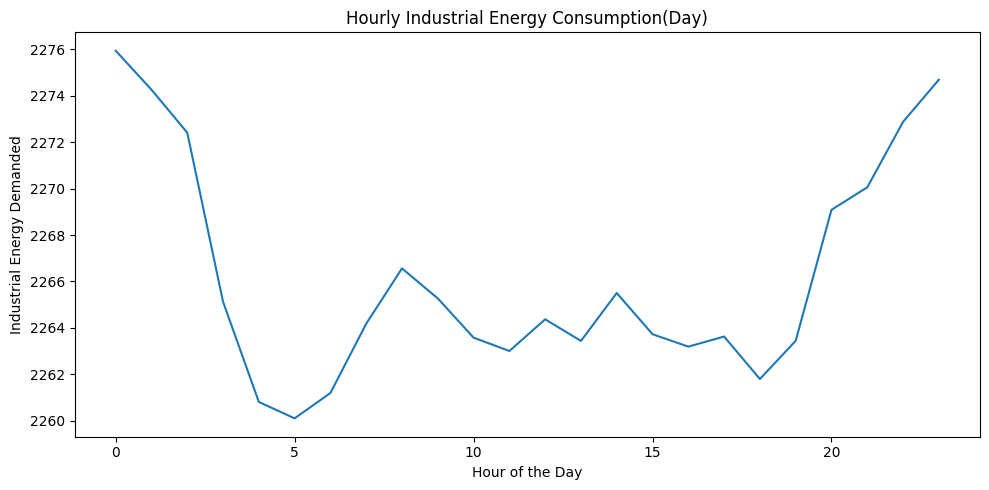

In [58]:
df_ind_clean.groupby(hour).mean(numeric_only=True)['Industrial'].plot(figsize=(10, 5))
plt.title('Hourly Industrial Energy Consumption(Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Industrial Energy Demanded')
plt.tight_layout()

main_dir = main
file_name = df_ind_clean
dest_path = 'visuals'
save_name = 'trend_for_industrial_daily_energy_consumption'
ext = '.png'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

###### <font color = 'purple'> Seasonality and Trend by day of the week

In [59]:
dayofweek = df_ind_clean.index.dayofweek
dayofweek

Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       ...
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype='int32', name='date-time', length=115392)

The file is trend_for_weekly_industrial_energy_consumption and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Time_Series_Analysis_Projects\Energy_Consumption_Forecast_Project/visuals folder


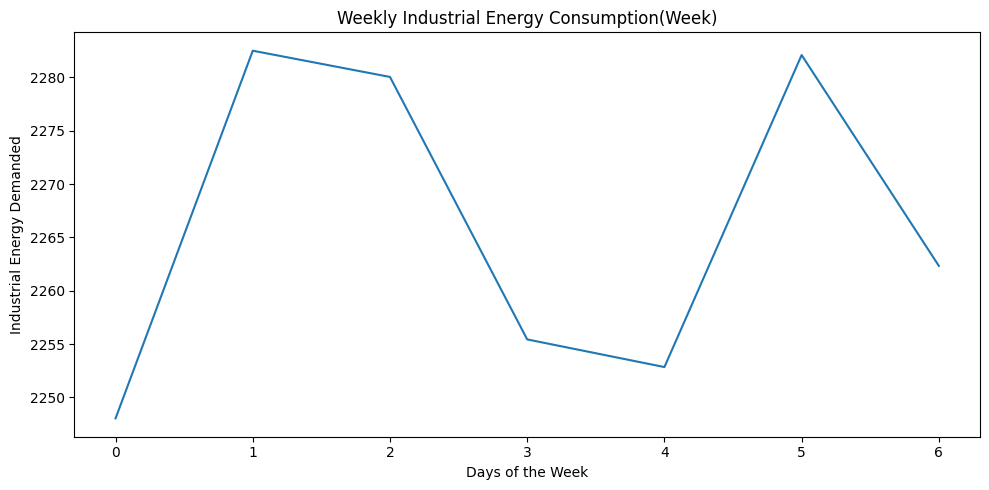

In [60]:
df_ind_clean.groupby(dayofweek).mean(numeric_only=True)['Industrial'].plot(figsize=(10, 5))
plt.title('Weekly Industrial Energy Consumption(Week)')
plt.xlabel('Days of the Week')
plt.ylabel('Industrial Energy Demanded')
plt.tight_layout()

main_dir = main
file_name = df_ind_clean
dest_path = 'visuals'
save_name = 'trend_for_weekly_industrial_energy_consumption'
ext = '.png'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

###### <font color = 'purple'> Seasonality and Trend by Month of the Year

In [61]:
month = df_ind_clean.index.month
month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype='int32', name='date-time', length=115392)

The file is trend_for_monthly_industrial_energy_consumption and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Time_Series_Analysis_Projects\Energy_Consumption_Forecast_Project/visuals folder


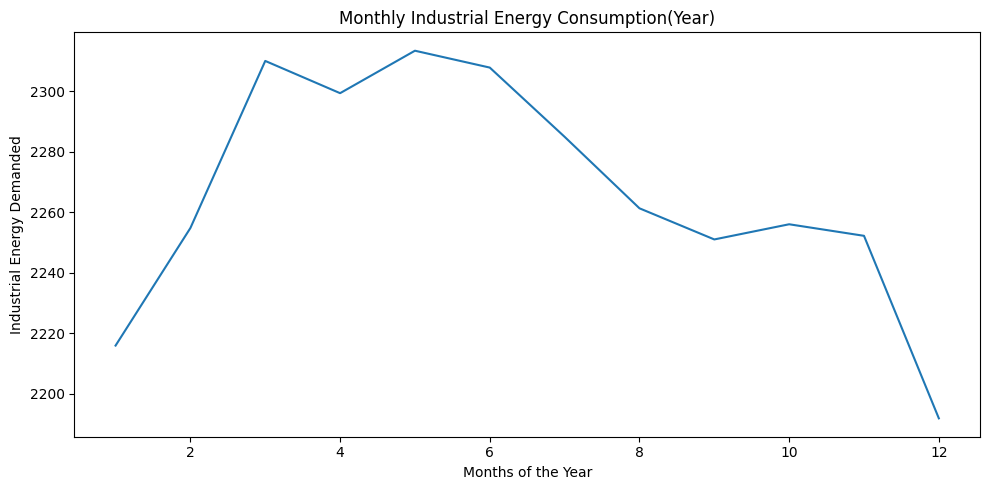

In [62]:
df_ind_clean.groupby(month).mean(numeric_only=True)['Industrial'].plot(figsize=(10, 5))
plt.title('Monthly Industrial Energy Consumption(Year)')
plt.xlabel('Months of the Year')
plt.ylabel('Industrial Energy Demanded')
plt.tight_layout()

main_dir = main
file_name = df_ind_clean
dest_path = 'visuals'
save_name = 'trend_for_monthly_industrial_energy_consumption'
ext = '.png'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

#### <font color = 'purple'> Aggregating the Total Energy Consumed Over a Period

In [63]:
data

,Date,Period,OperationalLessIndustrial,Industrial
0,37257,1,3535.867064,1086.132936
1,37257,2,3383.499028,1088.500972
2,37257,3,3655.527552,1084.472448
3,37257,4,3510.446636,1085.553364
4,37257,5,3294.697156,1081.302844
...,...,...,...,...
230779,42064,44,NaN,NaN
230780,42064,45,NaN,NaN
230781,42064,46,NaN,NaN
230782,42064,47,NaN,NaN


In [64]:
data['total_energy'] = data['OperationalLessIndustrial'] + data['Industrial']
data

,Date,Period,OperationalLessIndustrial,Industrial,total_energy
0,37257,1,3535.867064,1086.132936,4622.0
1,37257,2,3383.499028,1088.500972,4472.0
2,37257,3,3655.527552,1084.472448,4740.0
3,37257,4,3510.446636,1085.553364,4596.0
4,37257,5,3294.697156,1081.302844,4376.0
...,...,...,...,...,...
230779,42064,44,NaN,NaN,NaN
230780,42064,45,NaN,NaN,NaN
230781,42064,46,NaN,NaN,NaN
230782,42064,47,NaN,NaN,NaN


###### <font color = 'purple'> Transform the Date column to standard date time format

In [65]:
data['date'] = data.Date.apply(lambda y: pd.Timestamp('1899-12-31') + pd.Timedelta(y, unit='days'))
data

,Date,Period,OperationalLessIndustrial,Industrial,total_energy,date
0,37257,1,3535.867064,1086.132936,4622.0,2002-01-02
1,37257,2,3383.499028,1088.500972,4472.0,2002-01-02
2,37257,3,3655.527552,1084.472448,4740.0,2002-01-02
3,37257,4,3510.446636,1085.553364,4596.0,2002-01-02
4,37257,5,3294.697156,1081.302844,4376.0,2002-01-02
...,...,...,...,...,...,...
230779,42064,44,NaN,NaN,NaN,2015-03-02
230780,42064,45,NaN,NaN,NaN,2015-03-02
230781,42064,46,NaN,NaN,NaN,2015-03-02
230782,42064,47,NaN,NaN,NaN,2015-03-02


###### <font color = 'purple'> Transform the 'date' column to include the 30 minutes intervals

In [66]:
data['date-time'] = data['date'] + pd.to_timedelta((data['Period'] - 1) * 30, unit='m')
data

,Date,Period,OperationalLessIndustrial,Industrial,total_energy,date,date-time
0,37257,1,3535.867064,1086.132936,4622.0,2002-01-02,2002-01-02 00:00:00
1,37257,2,3383.499028,1088.500972,4472.0,2002-01-02,2002-01-02 00:30:00
2,37257,3,3655.527552,1084.472448,4740.0,2002-01-02,2002-01-02 01:00:00
3,37257,4,3510.446636,1085.553364,4596.0,2002-01-02,2002-01-02 01:30:00
4,37257,5,3294.697156,1081.302844,4376.0,2002-01-02,2002-01-02 02:00:00
...,...,...,...,...,...,...,...
230779,42064,44,NaN,NaN,NaN,2015-03-02,2015-03-02 21:30:00
230780,42064,45,NaN,NaN,NaN,2015-03-02,2015-03-02 22:00:00
230781,42064,46,NaN,NaN,NaN,2015-03-02,2015-03-02 22:30:00
230782,42064,47,NaN,NaN,NaN,2015-03-02,2015-03-02 23:00:00


###### <font color = 'purple'> Checking for Missing Values and Duplicates

In [67]:
data.isnull().sum()

Date                          0
Period                        0
OperationalLessIndustrial    48
Industrial                   48
total_energy                 48
date                          0
date-time                     0
dtype: int64

In [68]:
data.duplicated().sum()

0

###### <font color = 'purple'> Correcting the Missing Values

In [69]:
file = data
data_clean = ol.missing_value_corrector_v2(file)
data_clean

,Date,Period,OperationalLessIndustrial,Industrial,total_energy,date,date-time
0,37257,1,3535.867064,1086.132936,4622.000000,2002-01-02,2002-01-02 00:00:00
1,37257,2,3383.499028,1088.500972,4472.000000,2002-01-02,2002-01-02 00:30:00
2,37257,3,3655.527552,1084.472448,4740.000000,2002-01-02,2002-01-02 01:00:00
3,37257,4,3510.446636,1085.553364,4596.000000,2002-01-02,2002-01-02 01:30:00
4,37257,5,3294.697156,1081.302844,4376.000000,2002-01-02,2002-01-02 02:00:00
...,...,...,...,...,...,...,...
230779,42064,44,4638.962960,1133.089038,5772.051999,2015-03-02,2015-03-02 21:30:00
230780,42064,45,4638.962960,1133.089038,5772.051999,2015-03-02,2015-03-02 22:00:00
230781,42064,46,4638.962960,1133.089038,5772.051999,2015-03-02,2015-03-02 22:30:00
230782,42064,47,4638.962960,1133.089038,5772.051999,2015-03-02,2015-03-02 23:00:00


###### <font color = 'purple'> Select the columns of interest

In [70]:
data_clean = data_clean[['date-time', 'OperationalLessIndustrial', 'Industrial', 'total_energy']]
data_clean

,date-time,OperationalLessIndustrial,Industrial,total_energy
0,2002-01-02 00:00:00,3535.867064,1086.132936,4622.000000
1,2002-01-02 00:30:00,3383.499028,1088.500972,4472.000000
2,2002-01-02 01:00:00,3655.527552,1084.472448,4740.000000
3,2002-01-02 01:30:00,3510.446636,1085.553364,4596.000000
4,2002-01-02 02:00:00,3294.697156,1081.302844,4376.000000
...,...,...,...,...
230779,2015-03-02 21:30:00,4638.962960,1133.089038,5772.051999
230780,2015-03-02 22:00:00,4638.962960,1133.089038,5772.051999
230781,2015-03-02 22:30:00,4638.962960,1133.089038,5772.051999
230782,2015-03-02 23:00:00,4638.962960,1133.089038,5772.051999


In [71]:
data_clean.columns = ['date-time', 'operations', 'industrial', 'total_energy']
data_clean

,date-time,operations,industrial,total_energy
0,2002-01-02 00:00:00,3535.867064,1086.132936,4622.000000
1,2002-01-02 00:30:00,3383.499028,1088.500972,4472.000000
2,2002-01-02 01:00:00,3655.527552,1084.472448,4740.000000
3,2002-01-02 01:30:00,3510.446636,1085.553364,4596.000000
4,2002-01-02 02:00:00,3294.697156,1081.302844,4376.000000
...,...,...,...,...
230779,2015-03-02 21:30:00,4638.962960,1133.089038,5772.051999
230780,2015-03-02 22:00:00,4638.962960,1133.089038,5772.051999
230781,2015-03-02 22:30:00,4638.962960,1133.089038,5772.051999
230782,2015-03-02 23:00:00,4638.962960,1133.089038,5772.051999


###### <font color = 'purple'> Change the dataset index to date-time

In [72]:
data_clean = data_clean.set_index('date-time')
data_clean

,operations,industrial,total_energy
date-time,,,
2002-01-02 00:00:00,3535.867064,1086.132936,4622.000000
2002-01-02 00:30:00,3383.499028,1088.500972,4472.000000
2002-01-02 01:00:00,3655.527552,1084.472448,4740.000000
2002-01-02 01:30:00,3510.446636,1085.553364,4596.000000
2002-01-02 02:00:00,3294.697156,1081.302844,4376.000000
...,...,...,...
2015-03-02 21:30:00,4638.962960,1133.089038,5772.051999
2015-03-02 22:00:00,4638.962960,1133.089038,5772.051999
2015-03-02 22:30:00,4638.962960,1133.089038,5772.051999


###### <font color = 'purple'> Correct for data inconsistence using resampling for 1 hour interval

In [73]:
data_clean = data_clean.resample('h')
data_clean

###### <font color = 'purple'> Aggregation of the resampled data into 1 hour interval

In [74]:
data_clean = data_clean.agg({'operations':'sum','industrial':'sum','total_energy':'sum'})
data_clean

,operations,industrial,total_energy
date-time,,,
2002-01-02 00:00:00,6919.366092,2174.633908,9094.000000
2002-01-02 01:00:00,7165.974188,2170.025812,9336.000000
2002-01-02 02:00:00,6406.542994,2167.457006,8574.000000
2002-01-02 03:00:00,5815.537828,2156.462172,7972.000000
2002-01-02 04:00:00,5497.732922,2162.267078,7660.000000
...,...,...,...
2015-03-02 19:00:00,9277.925921,2266.178077,11544.103998
2015-03-02 20:00:00,9277.925921,2266.178077,11544.103998
2015-03-02 21:00:00,9277.925921,2266.178077,11544.103998


###### <font color = 'purple'> Seasonality and Trends

In [75]:
data_clean.index.min()

Timestamp('2002-01-02 00:00:00')

In [76]:
data_clean.index.max()

Timestamp('2015-03-02 23:00:00')

###### <font color = 'purple'> Seasonality and Trend by day

In [77]:
hour = data_clean.index.hour
hour

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype='int32', name='date-time', length=115392)

The file is trend_for_total_daily_energy_consumption and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Time_Series_Analysis_Projects\Energy_Consumption_Forecast_Project/visuals folder


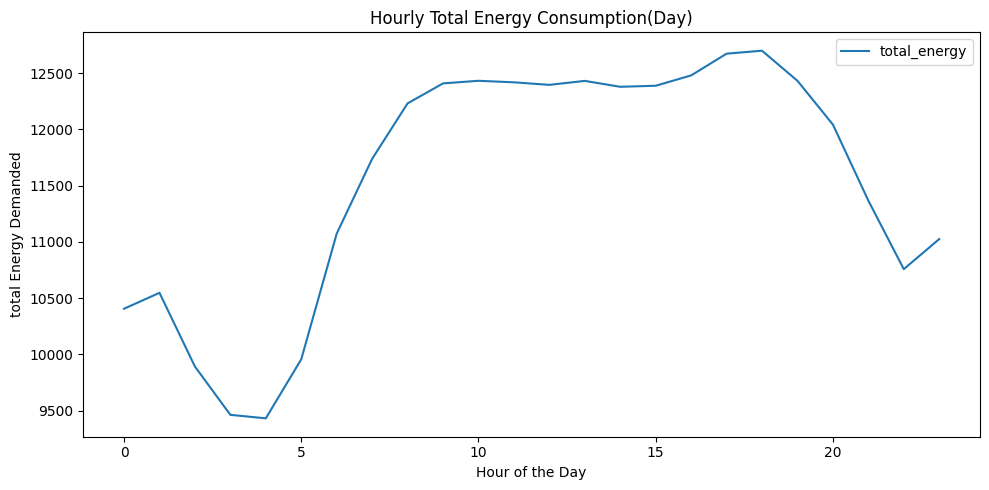

In [78]:
data_clean.groupby(hour).mean(numeric_only=True)[['total_energy']].plot(figsize=(10, 5))
plt.title('Hourly Total Energy Consumption(Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('total Energy Demanded')
plt.tight_layout()

main_dir = main
file_name = data_clean
dest_path = 'visuals'
save_name = 'trend_for_total_daily_energy_consumption'
ext = '.png'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is trend_for_total_daily_energy_consumption1 and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Time_Series_Analysis_Projects\Energy_Consumption_Forecast_Project/visuals folder


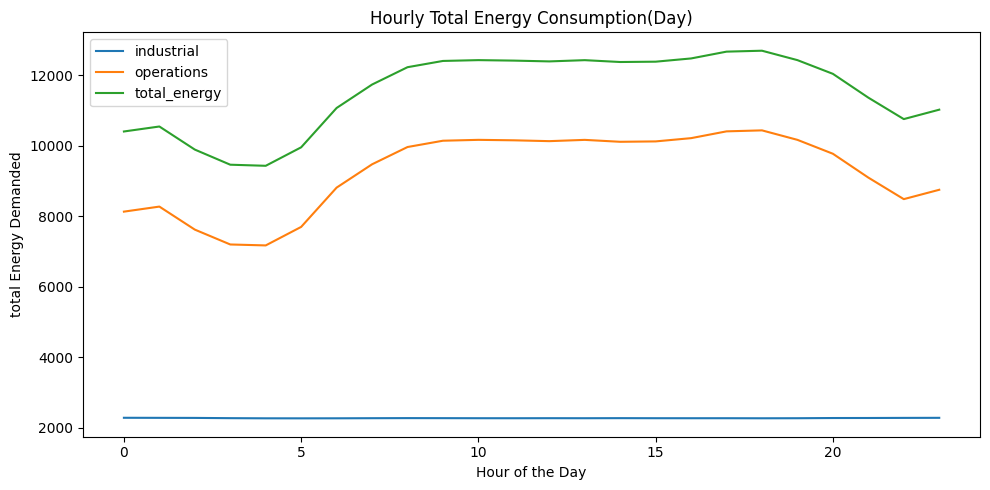

In [79]:
data_clean.groupby(hour).mean(numeric_only=True)[['industrial', 'operations', 'total_energy']].plot(figsize=(10, 5))
plt.title('Hourly Total Energy Consumption(Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('total Energy Demanded')
plt.tight_layout()

main_dir = main
file_name = data_clean
dest_path = 'visuals'
save_name = 'trend_for_total_daily_energy_consumption1'
ext = '.png'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

###### <font color = 'purple'> Seasonality and Trend for the day of the week 

In [80]:
dayofweek = data_clean.index.dayofweek
dayofweek

Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       ...
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype='int32', name='date-time', length=115392)

The file is trend_for_weekly_total_energy_consumption and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Time_Series_Analysis_Projects\Energy_Consumption_Forecast_Project/visuals folder


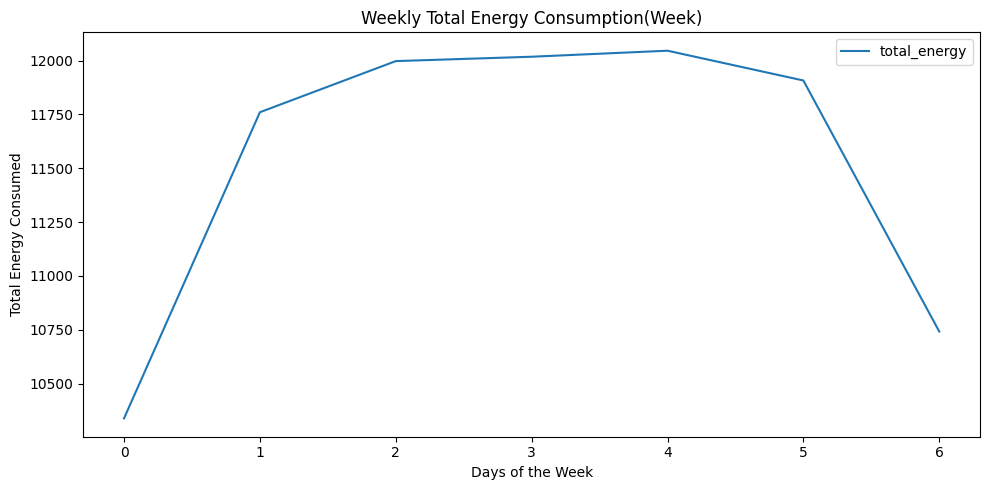

In [81]:
data_clean.groupby(dayofweek).mean(numeric_only=True)[['total_energy']].plot(figsize=(10, 5))
plt.title('Weekly Total Energy Consumption(Week)')
plt.xlabel('Days of the Week')
plt.ylabel('Total Energy Consumed')
plt.tight_layout()

main_dir = main
file_name = data_clean
dest_path = 'visuals'
save_name = 'trend_for_weekly_total_energy_consumption'
ext = '.png'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is trend_for_weekly_total_energy_consumption1 and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Time_Series_Analysis_Projects\Energy_Consumption_Forecast_Project/visuals folder


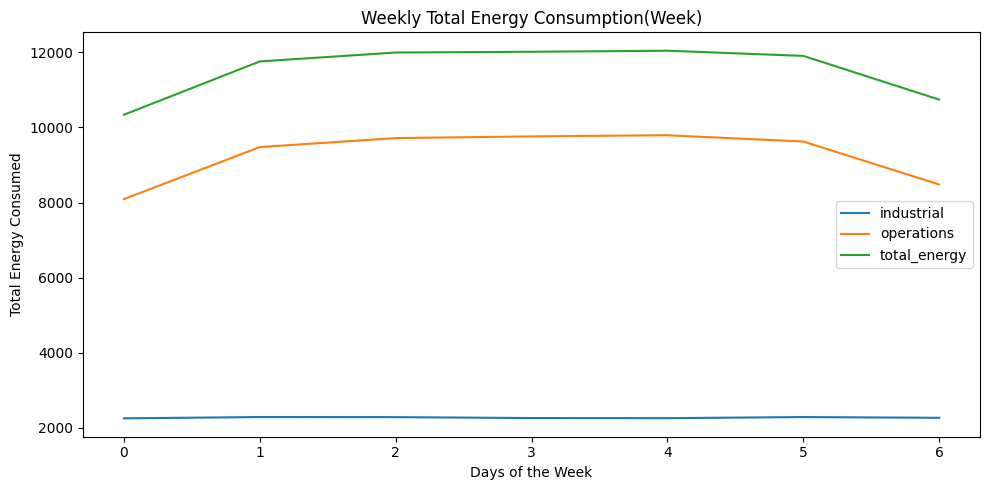

In [82]:
data_clean.groupby(dayofweek).mean(numeric_only=True)[['industrial', 'operations', 'total_energy']].plot(figsize=(10, 5))
plt.title('Weekly Total Energy Consumption(Week)')
plt.xlabel('Days of the Week')
plt.ylabel('Total Energy Consumed')
plt.tight_layout()

main_dir = main
file_name = data_clean
dest_path = 'visuals'
save_name = 'trend_for_weekly_total_energy_consumption1'
ext = '.png'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

###### <font color = 'purple'> Seasonality and Trend by the Month of the Year 

In [83]:
month = data_clean.index.month
month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype='int32', name='date-time', length=115392)

The file is trend_for_monthly_total_energy_consumption and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Time_Series_Analysis_Projects\Energy_Consumption_Forecast_Project/visuals folder


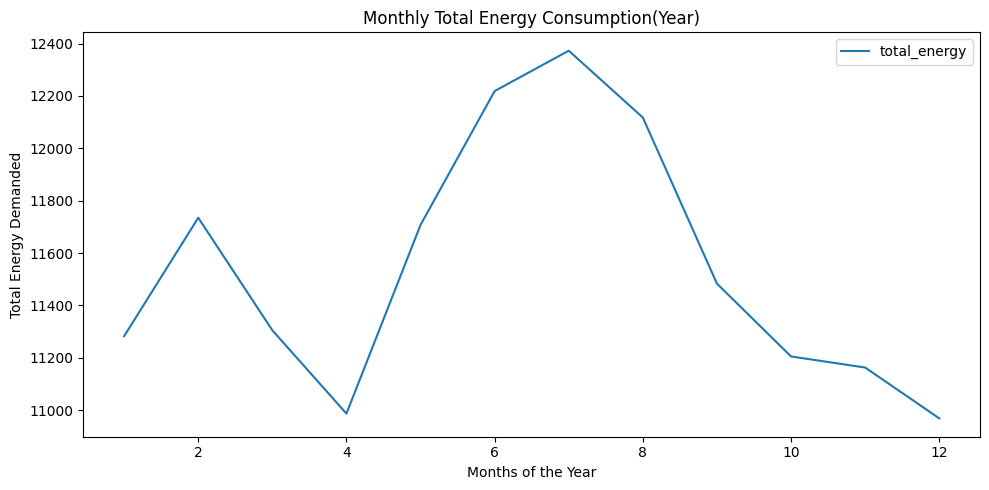

In [84]:
data_clean.groupby(month).mean(numeric_only=True)[['total_energy']].plot(figsize=(10, 5))
plt.title('Monthly Total Energy Consumption(Year)')
plt.xlabel('Months of the Year')
plt.ylabel('Total Energy Demanded')
plt.tight_layout()

main_dir = main
file_name = data_clean
dest_path = 'visuals'
save_name = 'trend_for_monthly_total_energy_consumption'
ext = '.png'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is trend_for_monthly_total_energy_consumption1 and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Time_Series_Analysis_Projects\Energy_Consumption_Forecast_Project/visuals folder


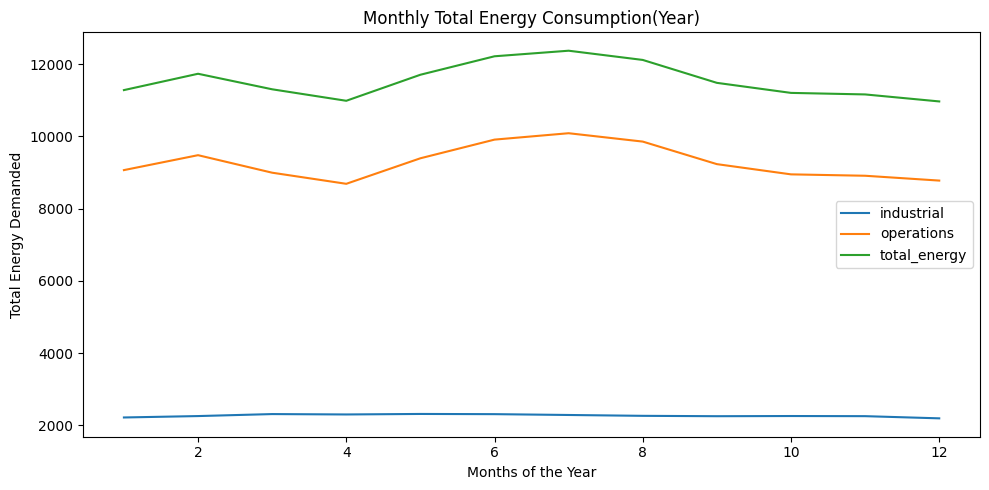

In [85]:
data_clean.groupby(month).mean(numeric_only=True)[['industrial', 'operations', 'total_energy']].plot(figsize=(10, 5))
plt.title('Monthly Total Energy Consumption(Year)')
plt.xlabel('Months of the Year')
plt.ylabel('Total Energy Demanded')
plt.tight_layout()

main_dir = main
file_name = data_clean
dest_path = 'visuals'
save_name = 'trend_for_monthly_total_energy_consumption1'
ext = '.png'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

## <font color = 'purple'> Modeling the Time Series Data

In time series, predictions or forecast is possible because of the knowledge of the previous event that is, I can predict a pattern or behaviour in a time series dataset with the past or previous knowledge.

Modeling in time series is unique because, we are the ones that will generate features from the dataset to be use in building the model and this is handled strategically.

##### <font color = 'red'> Build a model with the df_ops_clean dataset

In [86]:
df_ops_clean

,energy_demand,date-time-interval
0,3535.867064,2002-01-02 00:00:00
1,3383.499028,2002-01-02 00:30:00
2,3655.527552,2002-01-02 01:00:00
3,3510.446636,2002-01-02 01:30:00
4,3294.697156,2002-01-02 02:00:00
...,...,...
230779,4638.962960,2015-03-02 21:30:00
230780,4638.962960,2015-03-02 22:00:00
230781,4638.962960,2015-03-02 22:30:00
230782,4638.962960,2015-03-02 23:00:00


In [87]:
df_ops_clean = df_ops_clean.set_index('date-time-interval')
df_ops_clean

,energy_demand
date-time-interval,
2002-01-02 00:00:00,3535.867064
2002-01-02 00:30:00,3383.499028
2002-01-02 01:00:00,3655.527552
2002-01-02 01:30:00,3510.446636
2002-01-02 02:00:00,3294.697156
...,...
2015-03-02 21:30:00,4638.962960
2015-03-02 22:00:00,4638.962960
2015-03-02 22:30:00,4638.962960


In [88]:
# Resample to correct data inconsistence

df_ops_clean = df_ops_clean.resample('h')

In [89]:
len(df_ops_clean)

115392

In [90]:
# Aggregate the resample data by sum using the energy_demand column

df_ops_clean = df_ops_clean.agg({'energy_demand':'sum'})
df_ops_clean

,energy_demand
date-time-interval,
2002-01-02 00:00:00,6919.366092
2002-01-02 01:00:00,7165.974188
2002-01-02 02:00:00,6406.542994
2002-01-02 03:00:00,5815.537828
2002-01-02 04:00:00,5497.732922
...,...
2015-03-02 19:00:00,9277.925921
2015-03-02 20:00:00,9277.925921
2015-03-02 21:00:00,9277.925921


This dataset is shift for 1 hour already when resampled and hence we would need to create features using this one hour shift window.

###### Time Shifting - Generate a new feature in the dataset that lags by the 1hr time interval. This can be a choice depending on the insights you are interested in.

###### hour_to_date
###### month_to_date
###### year_to_date

In [91]:
df_copy = df_ops_clean.copy()

In [92]:
# One-Hour Period Shift

lag = '1h'

df_copy[f'y_log{lag}'] = df_copy.energy_demand.shift(freq=lag)

df_copy

,energy_demand,y_log1h
date-time-interval,,
2002-01-02 00:00:00,6919.366092,NaN
2002-01-02 01:00:00,7165.974188,6919.366092
2002-01-02 02:00:00,6406.542994,7165.974188
2002-01-02 03:00:00,5815.537828,6406.542994
2002-01-02 04:00:00,5497.732922,5815.537828
...,...,...
2015-03-02 19:00:00,9277.925921,9277.925921
2015-03-02 20:00:00,9277.925921,9277.925921
2015-03-02 21:00:00,9277.925921,9277.925921


In [93]:
# 24-Hour Period Shift - 24hours contains 24 unique measurements - 1 - 24

lag = '24h'

df_copy[f'y_log{lag}'] = df_copy.energy_demand.shift(freq=lag)

df_copy

,energy_demand,y_log1h,y_log24h
date-time-interval,,,
2002-01-02 00:00:00,6919.366092,NaN,NaN
2002-01-02 01:00:00,7165.974188,6919.366092,NaN
2002-01-02 02:00:00,6406.542994,7165.974188,NaN
2002-01-02 03:00:00,5815.537828,6406.542994,NaN
2002-01-02 04:00:00,5497.732922,5815.537828,NaN
...,...,...,...
2015-03-02 19:00:00,9277.925921,9277.925921,9596.777060
2015-03-02 20:00:00,9277.925921,9277.925921,8883.230296
2015-03-02 21:00:00,9277.925921,9277.925921,8320.260550


In [94]:
df_copy.head(50)

,energy_demand,y_log1h,y_log24h
date-time-interval,,,
2002-01-02 00:00:00,6919.366092,NaN,NaN
2002-01-02 01:00:00,7165.974188,6919.366092,NaN
2002-01-02 02:00:00,6406.542994,7165.974188,NaN
2002-01-02 03:00:00,5815.537828,6406.542994,NaN
2002-01-02 04:00:00,5497.732922,5815.537828,NaN
2002-01-02 05:00:00,5385.851060,5497.732922,NaN
2002-01-02 06:00:00,5574.731890,5385.851060,NaN
2002-01-02 07:00:00,5457.770634,5574.731890,NaN
2002-01-02 08:00:00,5698.152000,5457.770634,NaN


In [95]:
# Lagging by week shift - week contains 6 unique measurements - 1 - 6. The 7th day is the starting point

lag = '6d'

df_copy[f'y_lag{lag}'] = df_copy.energy_demand.shift(freq=lag)

df_copy

,energy_demand,y_log1h,y_log24h,y_log6d
date-time-interval,,,,
2002-01-02 00:00:00,6919.366092,NaN,NaN,NaN
2002-01-02 01:00:00,7165.974188,6919.366092,NaN,NaN
2002-01-02 02:00:00,6406.542994,7165.974188,NaN,NaN
2002-01-02 03:00:00,5815.537828,6406.542994,NaN,NaN
2002-01-02 04:00:00,5497.732922,5815.537828,NaN,NaN
...,...,...,...,...
2015-03-02 19:00:00,9277.925921,9277.925921,9596.777060,9809.917230
2015-03-02 20:00:00,9277.925921,9277.925921,8883.230296,9259.823576
2015-03-02 21:00:00,9277.925921,9277.925921,8320.260550,8373.408904


In [96]:
df_copy.tail()

,energy_demand,y_log1h,y_log24h,y_log6d
date-time-interval,,,,
2015-03-02 19:00:00,9277.925921,9277.925921,9596.777060,9809.917230
2015-03-02 20:00:00,9277.925921,9277.925921,8883.230296,9259.823576
2015-03-02 21:00:00,9277.925921,9277.925921,8320.260550,8373.408904
2015-03-02 22:00:00,9277.925921,9277.925921,8110.055916,8030.429152
2015-03-02 23:00:00,9277.925921,9277.925921,8519.368752,8551.848448


###### Windowing - what interval makes sense for changes in the dataset to be observable

###### The minimum hour is 1hr in the dataset, we choose a window slightly above 1hr but not too far so that observable changes are not lost.

###### <font color = 'grey'> 1hr Rolling Window - 1hr Moving Average

In [97]:
lag = '1h'   # frequency of the time interval y shift of 1hr

window_size = 3   # 3 time_interval moving average - 3 hours moving average

mv_avg = df_copy.energy_demand.rolling(window=window_size).agg(['mean','std']).shift(freq=lag)

In [98]:
mv_avg

,mean,std
date-time-interval,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,6830.627758,387.414253
2002-01-02 04:00:00,6462.685003,676.966421
2002-01-02 05:00:00,5906.604581,461.198224
...,...,...
2015-03-02 20:00:00,9277.925921,0.000000
2015-03-02 21:00:00,9277.925921,0.000000
2015-03-02 22:00:00,9277.925921,0.000000


In [99]:
mv_avg = mv_avg.add_prefix('y_window_3_')
mv_avg

,y_window_3_mean,y_window_3_std
date-time-interval,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,6830.627758,387.414253
2002-01-02 04:00:00,6462.685003,676.966421
2002-01-02 05:00:00,5906.604581,461.198224
...,...,...
2015-03-02 20:00:00,9277.925921,0.000000
2015-03-02 21:00:00,9277.925921,0.000000
2015-03-02 22:00:00,9277.925921,0.000000


###### <font color = 'grey'> Daily Moving Average - 24 hours rolling window

In [100]:
lag = '1h'

window_size = 24

mv_avg_24hr = df_copy.energy_demand.rolling(window=window_size).agg(['mean','std']).shift(freq=lag)

mv_avg_24hr.head(25)

,mean,std
date-time-interval,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,NaN,NaN
2002-01-02 04:00:00,NaN,NaN
2002-01-02 05:00:00,NaN,NaN
2002-01-02 06:00:00,NaN,NaN
2002-01-02 07:00:00,NaN,NaN
2002-01-02 08:00:00,NaN,NaN
2002-01-02 09:00:00,NaN,NaN


In [101]:
mv_avg_24hr = mv_avg_24hr.add_prefix('y_window_24_')
mv_avg_24hr.head()

,y_window_24_mean,y_window_24_std
date-time-interval,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,NaN,NaN
2002-01-02 04:00:00,NaN,NaN
2002-01-02 05:00:00,NaN,NaN


###### <font color = 'purple'> Merging the statistics and the features created

In [102]:
dfFinal = pd.concat([df_copy, mv_avg, mv_avg_24hr], axis=1)
dfFinal

,energy_demand,y_log1h,y_log24h,y_log6d,y_window_3_mean,y_window_3_std,y_window_24_mean,y_window_24_std
date-time-interval,,,,,,,,
2002-01-02 00:00:00,6919.366092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 01:00:00,7165.974188,6919.366092,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 02:00:00,6406.542994,7165.974188,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 03:00:00,5815.537828,6406.542994,NaN,NaN,6830.627758,387.414253,NaN,NaN
2002-01-02 04:00:00,5497.732922,5815.537828,NaN,NaN,6462.685003,676.966421,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-03-02 20:00:00,9277.925921,9277.925921,8883.230296,9259.823576,9277.925921,0.000000,9141.309747,333.903229
2015-03-02 21:00:00,9277.925921,9277.925921,8320.260550,8373.408904,9277.925921,0.000000,9157.755398,330.340363
2015-03-02 22:00:00,9277.925921,9277.925921,8110.055916,8030.429152,9277.925921,0.000000,9197.658122,278.559904


In [103]:
dfFinal['month'] = dfFinal.index.month
dfFinal['day'] = dfFinal.index.dayofweek
dfFinal['hour'] = dfFinal.index.hour

In [104]:
dfFinal

,energy_demand,y_log1h,y_log24h,y_log6d,y_window_3_mean,y_window_3_std,y_window_24_mean,y_window_24_std,month,day,hour
date-time-interval,,,,,,,,,,,
2002-01-02 00:00:00,6919.366092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,0
2002-01-02 01:00:00,7165.974188,6919.366092,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1
2002-01-02 02:00:00,6406.542994,7165.974188,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2
2002-01-02 03:00:00,5815.537828,6406.542994,NaN,NaN,6830.627758,387.414253,NaN,NaN,1,2,3
2002-01-02 04:00:00,5497.732922,5815.537828,NaN,NaN,6462.685003,676.966421,NaN,NaN,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...
2015-03-02 20:00:00,9277.925921,9277.925921,8883.230296,9259.823576,9277.925921,0.000000,9141.309747,333.903229,3,0,20
2015-03-02 21:00:00,9277.925921,9277.925921,8320.260550,8373.408904,9277.925921,0.000000,9157.755398,330.340363,3,0,21
2015-03-02 22:00:00,9277.925921,9277.925921,8110.055916,8030.429152,9277.925921,0.000000,9197.658122,278.559904,3,0,22


We are done with the creating of additional features and hence we can treat the dataset by removing the missing values.

In [105]:
dfFinal.isnull().sum()

energy_demand         1
y_log1h               2
y_log24h             25
y_log6d             145
y_window_3_mean       3
y_window_3_std        3
y_window_24_mean     24
y_window_24_std      24
month                 0
day                   0
hour                  0
dtype: int64

In [106]:
dfFinal.dropna(inplace=True)

dfFinal

,energy_demand,y_log1h,y_log24h,y_log6d,y_window_3_mean,y_window_3_std,y_window_24_mean,y_window_24_std,month,day,hour
date-time-interval,,,,,,,,,,,
2002-01-08 00:00:00,6808.008916,7290.234268,6722.984526,6919.366092,7060.366613,268.288238,7172.477074,882.158974,1,1,0
2002-01-08 01:00:00,7209.285712,6808.008916,7140.591176,7165.974188,6954.605689,291.436254,7176.019757,880.444422,1,1,1
2002-01-08 02:00:00,6535.818342,7209.285712,6562.022104,6406.542994,7102.509632,258.236657,7178.882029,880.435899,1,1,2
2002-01-08 03:00:00,6112.382636,6535.818342,5976.020780,5815.537828,6851.037657,338.789284,7177.790206,881.249994,1,1,3
2002-01-08 04:00:00,6165.882096,6112.382636,5688.468222,5497.732922,6619.162230,553.180569,7183.471950,873.570993,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
2015-03-02 19:00:00,9277.925921,9277.925921,9596.777060,9809.917230,9277.925921,0.000000,9154.595211,345.709846,3,0,19
2015-03-02 20:00:00,9277.925921,9277.925921,8883.230296,9259.823576,9277.925921,0.000000,9141.309747,333.903229,3,0,20
2015-03-02 21:00:00,9277.925921,9277.925921,8320.260550,8373.408904,9277.925921,0.000000,9157.755398,330.340363,3,0,21


In [107]:
dfFinal.isnull().sum()

energy_demand       0
y_log1h             0
y_log24h            0
y_log6d             0
y_window_3_mean     0
y_window_3_std      0
y_window_24_mean    0
y_window_24_std     0
month               0
day                 0
hour                0
dtype: int64

###### <font color = 'red'> Splitting the Dataset

###### The split is done by separating the features X and target y

In [108]:
dfFinal.head()

,energy_demand,y_log1h,y_log24h,y_log6d,y_window_3_mean,y_window_3_std,y_window_24_mean,y_window_24_std,month,day,hour
date-time-interval,,,,,,,,,,,
2002-01-08 00:00:00,6808.008916,7290.234268,6722.984526,6919.366092,7060.366613,268.288238,7172.477074,882.158974,1,1,0
2002-01-08 01:00:00,7209.285712,6808.008916,7140.591176,7165.974188,6954.605689,291.436254,7176.019757,880.444422,1,1,1
2002-01-08 02:00:00,6535.818342,7209.285712,6562.022104,6406.542994,7102.509632,258.236657,7178.882029,880.435899,1,1,2
2002-01-08 03:00:00,6112.382636,6535.818342,5976.020780,5815.537828,6851.037657,338.789284,7177.790206,881.249994,1,1,3
2002-01-08 04:00:00,6165.882096,6112.382636,5688.468222,5497.732922,6619.162230,553.180569,7183.471950,873.570993,1,1,4


In [109]:
# X = dfFinal.drop('energy_demand', axis=1)
X = dfFinal.drop(columns=['energy_demand'])
y = dfFinal['energy_demand']

In [110]:
X

,y_log1h,y_log24h,y_log6d,y_window_3_mean,y_window_3_std,y_window_24_mean,y_window_24_std,month,day,hour
date-time-interval,,,,,,,,,,
2002-01-08 00:00:00,7290.234268,6722.984526,6919.366092,7060.366613,268.288238,7172.477074,882.158974,1,1,0
2002-01-08 01:00:00,6808.008916,7140.591176,7165.974188,6954.605689,291.436254,7176.019757,880.444422,1,1,1
2002-01-08 02:00:00,7209.285712,6562.022104,6406.542994,7102.509632,258.236657,7178.882029,880.435899,1,1,2
2002-01-08 03:00:00,6535.818342,5976.020780,5815.537828,6851.037657,338.789284,7177.790206,881.249994,1,1,3
2002-01-08 04:00:00,6112.382636,5688.468222,5497.732922,6619.162230,553.180569,7183.471950,873.570993,1,1,4
...,...,...,...,...,...,...,...,...,...,...
2015-03-02 19:00:00,9277.925921,9596.777060,9809.917230,9277.925921,0.000000,9154.595211,345.709846,3,0,19
2015-03-02 20:00:00,9277.925921,8883.230296,9259.823576,9277.925921,0.000000,9141.309747,333.903229,3,0,20
2015-03-02 21:00:00,9277.925921,8320.260550,8373.408904,9277.925921,0.000000,9157.755398,330.340363,3,0,21


In [111]:
y

date-time-interval
2002-01-08 00:00:00    6808.008916
2002-01-08 01:00:00    7209.285712
2002-01-08 02:00:00    6535.818342
2002-01-08 03:00:00    6112.382636
2002-01-08 04:00:00    6165.882096
                          ...     
2015-03-02 19:00:00    9277.925921
2015-03-02 20:00:00    9277.925921
2015-03-02 21:00:00    9277.925921
2015-03-02 22:00:00    9277.925921
2015-03-02 23:00:00    9277.925921
Freq: h, Name: energy_demand, Length: 115248, dtype: float64

In [112]:
X.index.min()

Timestamp('2002-01-08 00:00:00')

In [113]:
X.index.max()

Timestamp('2015-03-02 23:00:00')

`In Time series, our train_test_split is done in a way that maintains the continuous trend without break so our approach in splitting is done such that we just choose a cut-off point.`

###### <font color = 'grey'> Train_Test_Split in Time Series

In [114]:
end_train = '2014-12-31 23:59:59'

X_train = X.loc[:end_train]
X_test = X.loc[end_train:]

y_train = y.loc[:end_train]
y_test = y.loc[end_train:]

In [115]:
print(f"length of X_train is {len(X_train)} and the length of X_test is {len(X_test)}")
print('')
print(f"length of y_train is {len(y_train)} and the length of y_test is {len(y_test)}")

length of X_train is 113784 and the length of X_test is 1464

length of y_train is 113784 and the length of y_test is 1464


Any data reserved for test in time series is a lost opportunity for the model to learn.

###### <font color = 'red'> Build the Model

###### <font color = 'grey'> Least Absolute Shrinkage and Selection Operator - LASSO

In [116]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [117]:
seed = 9

In [118]:
model_lasso = Lasso(random_state=seed)
model_lasso

Lasso(random_state=9)

###### <font color = 'grey'> Train the model on the data

In [119]:
model_lasso.fit(X_train, y_train)

Lasso(random_state=9)

###### <font color = 'grey'> Prediction with the model

In [120]:
y_pred = model_lasso.predict(X_test)
y_pred

array([8075.38593985, 7169.53977639, 6391.46680942, ..., 9263.6070704 ,
       9237.56826845, 9318.5076522 ])

###### <font color = 'grey'> Score the Model

In [121]:
mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error is: {mse}")

rmse = np.sqrt(mse)
print(f"root_mean_squared_error is: {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"coefficient_of_determination is: {r2}")

mean_squared_error is: 163346.89342444442
root_mean_squared_error is: 404.1619643465283
coefficient_of_determination is: 0.9487596440594154


###### Convert the y_pred to table form

In [123]:
y_pred_series = pd.Series(y_pred, index=y_test.index)
y_pred_series

date-time-interval
2015-01-01 00:00:00    8075.385940
2015-01-01 01:00:00    7169.539776
2015-01-01 02:00:00    6391.466809
2015-01-01 03:00:00    6161.153232
2015-01-01 04:00:00    6260.882975
                          ...     
2015-03-02 19:00:00    9437.725929
2015-03-02 20:00:00    9357.399335
2015-03-02 21:00:00    9263.607070
2015-03-02 22:00:00    9237.568268
2015-03-02 23:00:00    9318.507652
Freq: h, Length: 1464, dtype: float64

In [124]:
y_test

date-time-interval
2015-01-01 00:00:00    7566.135266
2015-01-01 01:00:00    6985.052416
2015-01-01 02:00:00    6557.741004
2015-01-01 03:00:00    6403.493644
2015-01-01 04:00:00    6614.084782
                          ...     
2015-03-02 19:00:00    9277.925921
2015-03-02 20:00:00    9277.925921
2015-03-02 21:00:00    9277.925921
2015-03-02 22:00:00    9277.925921
2015-03-02 23:00:00    9277.925921
Freq: h, Name: energy_demand, Length: 1464, dtype: float64

##### <font color = 'purple'> Visualization of the Performance of the model on the train and test data

<Axes: xlabel='date-time-interval'>

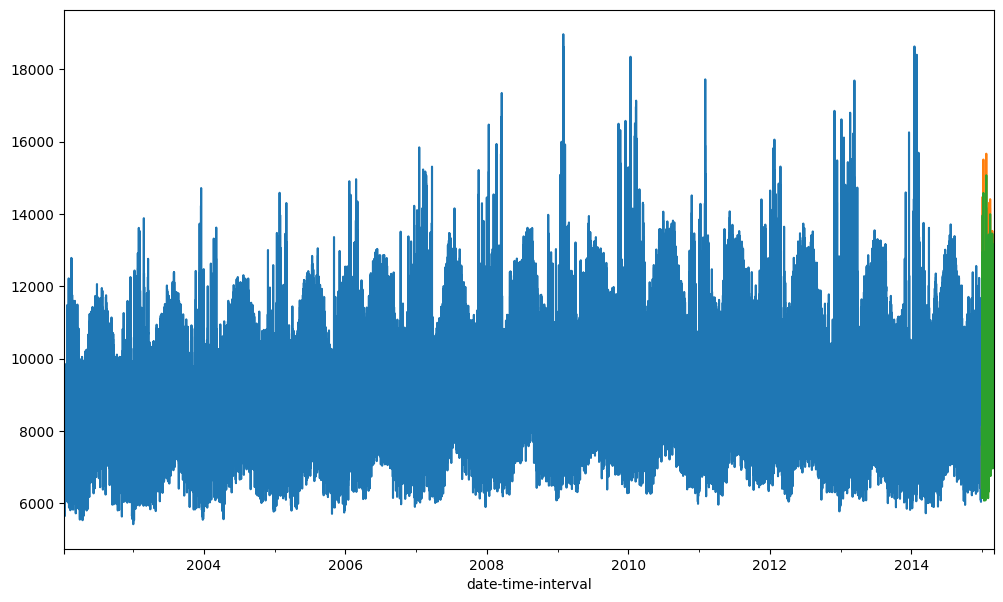

In [125]:
fig, ax = plt.subplots(figsize=(12, 7))

y_train.plot(ax=ax, label='Train')
y_test.plot(ax=ax, label='Test')
y_pred_series.plot(ax=ax, label='Predictions')

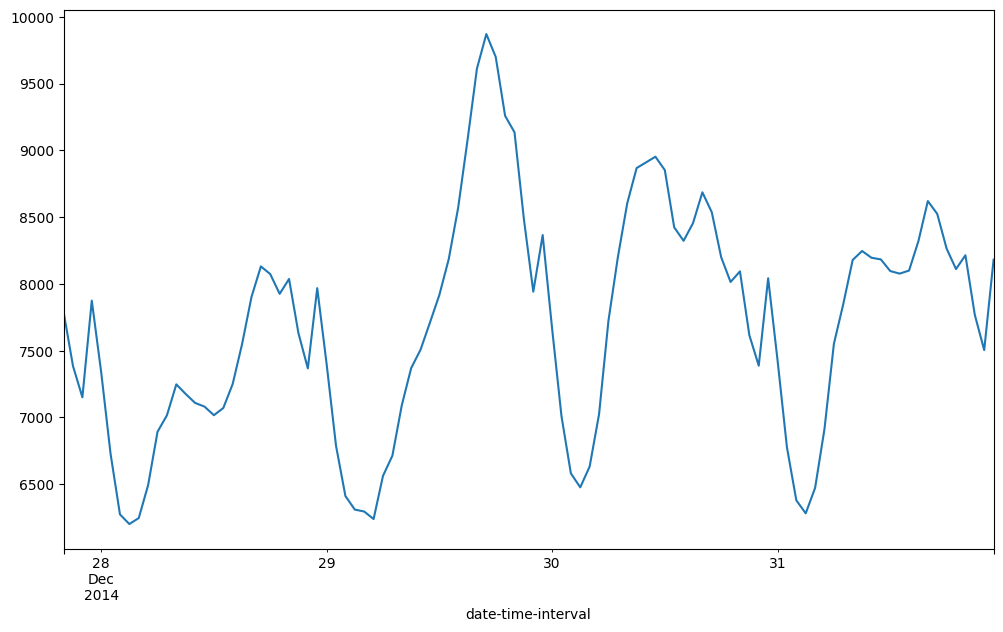

In [126]:
fig, ax = plt.subplots(figsize=(12, 7))

y_train[-100:].plot(ax=ax, label='Train')
plt.show()

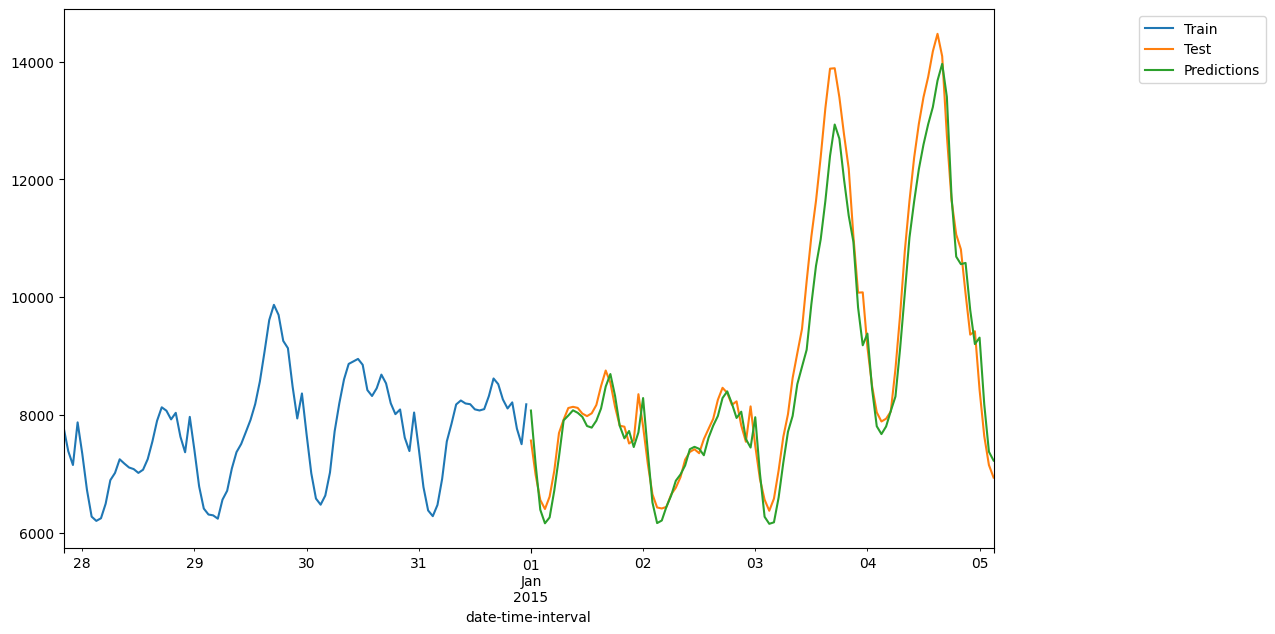

In [127]:
fig, ax = plt.subplots(figsize=(12, 7))

y_train[-100:].plot(ax=ax, label='Train')
y_test[:100].plot(ax=ax, label='Test')
y_pred_series.iloc[:100].plot(ax=ax, label='Predictions')
ax.legend(bbox_to_anchor=(1.3, 1.0))
plt.show()

###### <font color = 'purple'> Train another Model - RandomForestRegressor

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [129]:
num = 10
seed = 9

In [130]:
model_rf = RandomForestRegressor(n_estimators=num, random_state=seed)
model_rf

RandomForestRegressor(n_estimators=10, random_state=9)

In [131]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=9)

In [132]:
y_pred_rf = model_rf.predict(X_test)
y_pred_rf

array([7588.67568569, 6926.0821882 , 6486.9530714 , ..., 8507.7311646 ,
       8489.5146128 , 9203.8563274 ])

In [133]:
mse = mean_squared_error(y_test, y_pred_rf)
print(f"mean_squared_error_rf is: {mse}")

rmse = np.sqrt(mse)
print(f"root_mean_squared_error_rf is: {rmse}")

r2 = r2_score(y_test, y_pred_rf)
print(f"coefficient_of_determination for rf is: {r2}")

mean_squared_error_rf is: 39169.87246507703
root_mean_squared_error_rf is: 197.91380059277583
coefficient_of_determination for rf is: 0.9877127861743742


In [134]:
y_pred_rf = pd.Series(y_pred_rf, index=y_test.index)
y_pred_rf

date-time-interval
2015-01-01 00:00:00    7588.675686
2015-01-01 01:00:00    6926.082188
2015-01-01 02:00:00    6486.953071
2015-01-01 03:00:00    6311.163917
2015-01-01 04:00:00    6537.991896
                          ...     
2015-03-02 19:00:00    9348.702044
2015-03-02 20:00:00    8761.288137
2015-03-02 21:00:00    8507.731165
2015-03-02 22:00:00    8489.514613
2015-03-02 23:00:00    9203.856327
Freq: h, Length: 1464, dtype: float64

In [135]:
y_test

date-time-interval
2015-01-01 00:00:00    7566.135266
2015-01-01 01:00:00    6985.052416
2015-01-01 02:00:00    6557.741004
2015-01-01 03:00:00    6403.493644
2015-01-01 04:00:00    6614.084782
                          ...     
2015-03-02 19:00:00    9277.925921
2015-03-02 20:00:00    9277.925921
2015-03-02 21:00:00    9277.925921
2015-03-02 22:00:00    9277.925921
2015-03-02 23:00:00    9277.925921
Freq: h, Name: energy_demand, Length: 1464, dtype: float64

###### <font color = 'purple'> Visualization of the Performance of the model on the train and test data

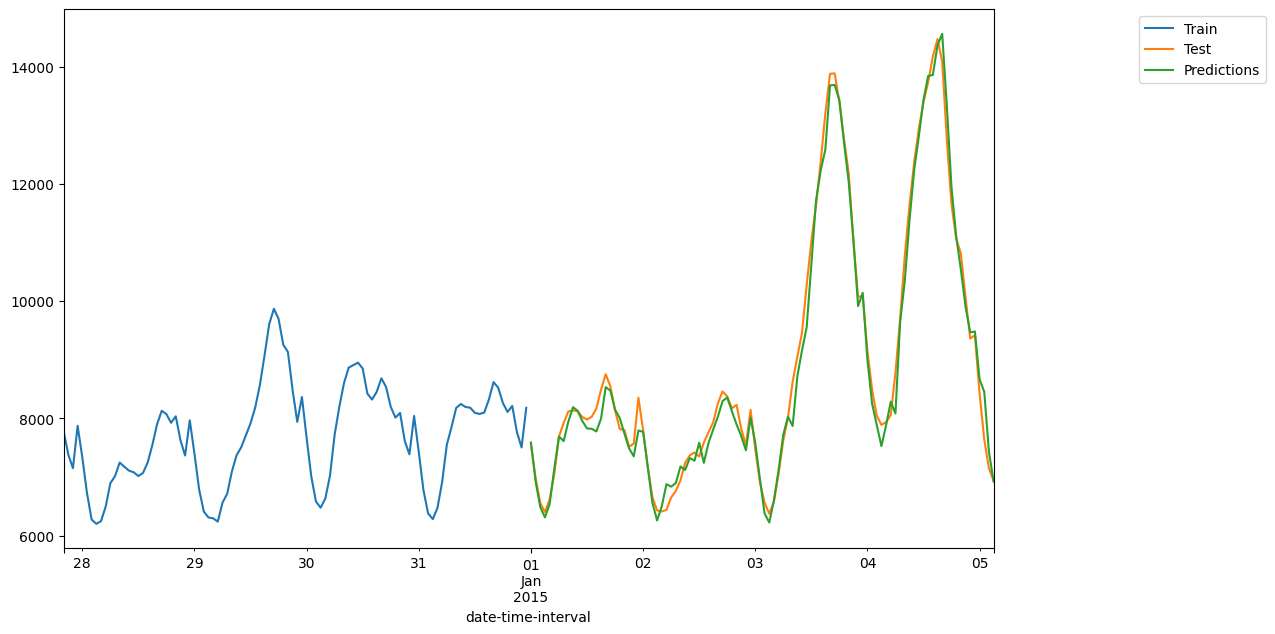

In [136]:
fig, ax = plt.subplots(figsize=(12, 7))

y_train[-100:].plot(ax=ax, label='Train')
y_test[:100].plot(ax=ax, label='Test')
y_pred_rf.iloc[:100].plot(ax=ax, label='Predictions')
ax.legend(bbox_to_anchor=(1.3, 1.0))

###### <font color = 'grey'> Save the best Model

In [137]:
help(ol.saving_model_versions)

Help on function saving_model_versions in module olanrewaju:

saving_model_versions(main_dir, model, path, save_model_name, ext)
    This function save any predictive models into a pickle file.
    Inputs:
        main_dir: This is the parent folder for the project which is a string i.e the folder where the folder you want to save the model in is created.
        model: This is the predictive model used to train the data. Must be called without enclosing in quotation marks.
        path: This is the folder name where you want to save the model. Must be string.
        save_model_name: This is the name the model is saved with, also in strings. The user defines the name of choice.
        ext: This is the format the user want the model to be saved into. Because Joblib is the library used,
              we adopt '.pk' for pickle, also in   strings.
    Output:
        The function automatically save the model and print a statement that confirm that it is saved in the folder specified.



In [138]:
main_dir = main
model = model_rf
path = 'models'
save_model_name = 'rf_model_time_series'
ext = '.pk'
ol.saving_model_versions(main_dir, model, path, save_model_name, ext)

The model is rf_model_time_series and is saved in the models folder


In [139]:
# Reserved for comments

##### <font color = 'red'> Build a Time Series Model using the `df_ind_clean` dataset

In [140]:
df_ind_clean

,Industrial
date-time,
2002-01-02 00:00:00,2174.633908
2002-01-02 01:00:00,2170.025812
2002-01-02 02:00:00,2167.457006
2002-01-02 03:00:00,2156.462172
2002-01-02 04:00:00,2162.267078
...,...
2015-03-02 19:00:00,2266.178077
2015-03-02 20:00:00,2266.178077
2015-03-02 21:00:00,2266.178077


In [141]:
ind_clean = df_ind_clean.copy()
ind_clean.head()

,Industrial
date-time,
2002-01-02 00:00:00,2174.633908
2002-01-02 01:00:00,2170.025812
2002-01-02 02:00:00,2167.457006
2002-01-02 03:00:00,2156.462172
2002-01-02 04:00:00,2162.267078


###### <font coor = 'grey'> Time Shifting and Features Creation

###### <font color = 'red'> One_Hour time interval lag

In [142]:
lag = '1h'
ind_clean[f"y_lag{lag}"] = ind_clean.Industrial.shift(freq=lag)
ind_clean

,Industrial,y_lag1h
date-time,,
2002-01-02 00:00:00,2174.633908,NaN
2002-01-02 01:00:00,2170.025812,2174.633908
2002-01-02 02:00:00,2167.457006,2170.025812
2002-01-02 03:00:00,2156.462172,2167.457006
2002-01-02 04:00:00,2162.267078,2156.462172
...,...,...
2015-03-02 19:00:00,2266.178077,2266.178077
2015-03-02 20:00:00,2266.178077,2266.178077
2015-03-02 21:00:00,2266.178077,2266.178077


###### <font color = 'red'> Two_Hour time interval

In [143]:
lag = '2h'
ind_clean[f"y_lag{lag}"] = ind_clean.Industrial.shift(freq=lag)
ind_clean

,Industrial,y_lag1h,y_lag2h
date-time,,,
2002-01-02 00:00:00,2174.633908,NaN,NaN
2002-01-02 01:00:00,2170.025812,2174.633908,NaN
2002-01-02 02:00:00,2167.457006,2170.025812,2174.633908
2002-01-02 03:00:00,2156.462172,2167.457006,2170.025812
2002-01-02 04:00:00,2162.267078,2156.462172,2167.457006
...,...,...,...
2015-03-02 19:00:00,2266.178077,2266.178077,2266.178077
2015-03-02 20:00:00,2266.178077,2266.178077,2266.178077
2015-03-02 21:00:00,2266.178077,2266.178077,2266.178077


###### <font color = 'red'> Three_Hour time interval

In [144]:
lag = '3h'
ind_clean[f"y_lag{lag}"] = ind_clean.Industrial.shift(freq=lag)
ind_clean

,Industrial,y_lag1h,y_lag2h,y_lag3h
date-time,,,,
2002-01-02 00:00:00,2174.633908,NaN,NaN,NaN
2002-01-02 01:00:00,2170.025812,2174.633908,NaN,NaN
2002-01-02 02:00:00,2167.457006,2170.025812,2174.633908,NaN
2002-01-02 03:00:00,2156.462172,2167.457006,2170.025812,2174.633908
2002-01-02 04:00:00,2162.267078,2156.462172,2167.457006,2170.025812
...,...,...,...,...
2015-03-02 19:00:00,2266.178077,2266.178077,2266.178077,2266.178077
2015-03-02 20:00:00,2266.178077,2266.178077,2266.178077,2266.178077
2015-03-02 21:00:00,2266.178077,2266.178077,2266.178077,2266.178077


###### <font color = 'red'> Four_Hour time interval

In [145]:
lag = '4h'
ind_clean[f"y_lag{lag}"] = ind_clean.Industrial.shift(freq=lag)
ind_clean

,Industrial,y_lag1h,y_lag2h,y_lag3h,y_lag4h
date-time,,,,,
2002-01-02 00:00:00,2174.633908,NaN,NaN,NaN,NaN
2002-01-02 01:00:00,2170.025812,2174.633908,NaN,NaN,NaN
2002-01-02 02:00:00,2167.457006,2170.025812,2174.633908,NaN,NaN
2002-01-02 03:00:00,2156.462172,2167.457006,2170.025812,2174.633908,NaN
2002-01-02 04:00:00,2162.267078,2156.462172,2167.457006,2170.025812,2174.633908
...,...,...,...,...,...
2015-03-02 19:00:00,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077
2015-03-02 20:00:00,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077
2015-03-02 21:00:00,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077


###### <font color = 'red'> Five_Hour time interval

In [146]:
lag = '5h'
ind_clean[f"y_lag{lag}"] = ind_clean.Industrial.shift(freq=lag)
ind_clean

,Industrial,y_lag1h,y_lag2h,y_lag3h,y_lag4h,y_lag5h
date-time,,,,,,
2002-01-02 00:00:00,2174.633908,NaN,NaN,NaN,NaN,NaN
2002-01-02 01:00:00,2170.025812,2174.633908,NaN,NaN,NaN,NaN
2002-01-02 02:00:00,2167.457006,2170.025812,2174.633908,NaN,NaN,NaN
2002-01-02 03:00:00,2156.462172,2167.457006,2170.025812,2174.633908,NaN,NaN
2002-01-02 04:00:00,2162.267078,2156.462172,2167.457006,2170.025812,2174.633908,NaN
...,...,...,...,...,...,...
2015-03-02 19:00:00,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077
2015-03-02 20:00:00,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077
2015-03-02 21:00:00,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077


###### <font color = 'red'> Six_Hour time interval

In [147]:
lag = '6h'
ind_clean[f"y_lag{lag}"] = ind_clean.Industrial.shift(freq=lag)
ind_clean

,Industrial,y_lag1h,y_lag2h,y_lag3h,y_lag4h,y_lag5h,y_lag6h
date-time,,,,,,,
2002-01-02 00:00:00,2174.633908,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 01:00:00,2170.025812,2174.633908,NaN,NaN,NaN,NaN,NaN
2002-01-02 02:00:00,2167.457006,2170.025812,2174.633908,NaN,NaN,NaN,NaN
2002-01-02 03:00:00,2156.462172,2167.457006,2170.025812,2174.633908,NaN,NaN,NaN
2002-01-02 04:00:00,2162.267078,2156.462172,2167.457006,2170.025812,2174.633908,NaN,NaN
...,...,...,...,...,...,...,...
2015-03-02 19:00:00,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077
2015-03-02 20:00:00,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077
2015-03-02 21:00:00,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077


###### <font color = 'red'> 24-hour time interval

In [148]:
lag = '24h'
ind_clean[f"y_lag{lag}"] = ind_clean.Industrial.shift(freq=lag)
ind_clean

,Industrial,y_lag1h,y_lag2h,y_lag3h,y_lag4h,y_lag5h,y_lag6h,y_lag24h
date-time,,,,,,,,
2002-01-02 00:00:00,2174.633908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 01:00:00,2170.025812,2174.633908,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 02:00:00,2167.457006,2170.025812,2174.633908,NaN,NaN,NaN,NaN,NaN
2002-01-02 03:00:00,2156.462172,2167.457006,2170.025812,2174.633908,NaN,NaN,NaN,NaN
2002-01-02 04:00:00,2162.267078,2156.462172,2167.457006,2170.025812,2174.633908,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-03-02 19:00:00,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,1361.222940
2015-03-02 20:00:00,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,1365.769704
2015-03-02 21:00:00,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,1363.739450


###### <font color = 'red'> Weekly_Hour time interval

In [149]:
lag = '6d'
ind_clean[f"y_lag{lag}"] = ind_clean.Industrial.shift(freq=lag)
ind_clean

,Industrial,y_lag1h,y_lag2h,y_lag3h,y_lag4h,y_lag5h,y_lag6h,y_lag24h,y_lag6d
date-time,,,,,,,,,
2002-01-02 00:00:00,2174.633908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 01:00:00,2170.025812,2174.633908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 02:00:00,2167.457006,2170.025812,2174.633908,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 03:00:00,2156.462172,2167.457006,2170.025812,2174.633908,NaN,NaN,NaN,NaN,NaN
2002-01-02 04:00:00,2162.267078,2156.462172,2167.457006,2170.025812,2174.633908,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2015-03-02 19:00:00,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,1361.222940,1545.082770
2015-03-02 20:00:00,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,1365.769704,1557.176424
2015-03-02 21:00:00,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,2266.178077,1363.739450,1539.591096


###### <font color = 'purple'> Rolling Window or Moving Average Period

`I will be exploring even and odd number of hourly moving average or rolling window`

###### <font color = 'red'> Even Number of Moving Average or Rolling Window 

###### <font color = 'violet'> 2 hours moving average

In [150]:
lag = '1h'
window_size = 2
mv_avg_2hr = ind_clean.Industrial.rolling(window=window_size).agg(['mean','std']).shift(freq=lag)
mv_avg_2hr.head()

,mean,std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,2172.329860,3.258416
2002-01-02 03:00:00,2168.741409,1.816420
2002-01-02 04:00:00,2161.959589,7.774522
2002-01-02 05:00:00,2159.364625,4.104688


In [151]:
mv_avg_2hr = mv_avg_2hr.add_prefix('y_lag_2hr_mvavg_')
mv_avg_2hr.head()

,y_lag_2hr_mvavg_mean,y_lag_2hr_mvavg_std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,2172.329860,3.258416
2002-01-02 03:00:00,2168.741409,1.816420
2002-01-02 04:00:00,2161.959589,7.774522
2002-01-02 05:00:00,2159.364625,4.104688


###### <font color = 'violet'> 4 hours moving average

In [152]:
lag = '1h'
window_size = 4
mv_avg_4hr = ind_clean.Industrial.rolling(window=window_size).agg(['mean','std']).shift(freq=lag)
mv_avg_4hr.head()

,mean,std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,NaN,NaN
2002-01-02 04:00:00,2167.144724,7.715849
2002-01-02 05:00:00,2164.053017,6.001998


In [153]:
mv_avg_4hr = mv_avg_4hr.add_prefix('y_lag_4hr_mvavg_')
mv_avg_4hr.head()

,y_lag_4hr_mvavg_mean,y_lag_4hr_mvavg_std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,NaN,NaN
2002-01-02 04:00:00,2167.144724,7.715849
2002-01-02 05:00:00,2164.053017,6.001998


###### <font color = 'red'> Odd Number of Hourly Moving Average or Rolling Window

###### <font color = 'violet'> 3 hours moving average

In [154]:
lag = '1h'
window_size = 3
mv_avg_3hr = ind_clean.Industrial.rolling(window=window_size).agg(['mean','std']).shift(freq=lag)
mv_avg_3hr.head()

,mean,std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,2170.705575,3.636418
2002-01-02 04:00:00,2164.648330,7.204830
2002-01-02 05:00:00,2162.062085,5.500283


In [155]:
mv_avg_3hr = mv_avg_3hr.add_prefix('y_lag_3hr_mvavg_')
mv_avg_3hr.head()

,y_lag_3hr_mvavg_mean,y_lag_3hr_mvavg_std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,2170.705575,3.636418
2002-01-02 04:00:00,2164.648330,7.204830
2002-01-02 05:00:00,2162.062085,5.500283


###### <font color = 'violet'> 5 hours moving average

In [156]:
lag = '1h'
window_size = 5
mv_avg_5hr = ind_clean.Industrial.rolling(window=window_size).agg(['mean','std']).shift(freq=lag)
mv_avg_5hr.head()

,mean,std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,NaN,NaN
2002-01-02 04:00:00,NaN,NaN
2002-01-02 05:00:00,2166.169195,7.029156


In [157]:
mv_avg_5hr = mv_avg_5hr.add_prefix('y_lag_5hr_mvavg_')
mv_avg_5hr.head()

,y_lag_5hr_mvavg_mean,y_lag_5hr_mvavg_std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,NaN,NaN
2002-01-02 04:00:00,NaN,NaN
2002-01-02 05:00:00,2166.169195,7.029156


##### <font color = 'purple'> Merge all the statistical and other features created together

In [158]:
df_ind_final = pd.concat([ind_clean, mv_avg_2hr, mv_avg_3hr, mv_avg_4hr, mv_avg_5hr], axis=1)
df_ind_final.head()

,Industrial,y_lag1h,y_lag2h,y_lag3h,y_lag4h,y_lag5h,y_lag6h,y_lag24h,y_lag6d,y_lag_2hr_mvavg_mean,y_lag_2hr_mvavg_std,y_lag_3hr_mvavg_mean,y_lag_3hr_mvavg_std,y_lag_4hr_mvavg_mean,y_lag_4hr_mvavg_std,y_lag_5hr_mvavg_mean,y_lag_5hr_mvavg_std
date-time,,,,,,,,,,,,,,,,,
2002-01-02 00:00:00,2174.633908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 01:00:00,2170.025812,2174.633908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 02:00:00,2167.457006,2170.025812,2174.633908,NaN,NaN,NaN,NaN,NaN,NaN,2172.329860,3.258416,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 03:00:00,2156.462172,2167.457006,2170.025812,2174.633908,NaN,NaN,NaN,NaN,NaN,2168.741409,1.816420,2170.705575,3.636418,NaN,NaN,NaN,NaN
2002-01-02 04:00:00,2162.267078,2156.462172,2167.457006,2170.025812,2174.633908,NaN,NaN,NaN,NaN,2161.959589,7.774522,2164.648330,7.204830,2167.144724,7.715849,NaN,NaN


In [159]:
df_ind_final.shape

(115393, 17)

###### <font color = 'red'> Extracting date and time features from the date-time - optional

In [160]:
df_ind_final['day'] = df_ind_final.index.dayofweek
df_ind_final['hour'] = df_ind_final.index.hour
df_ind_final['month'] = df_ind_final.index.month
df_ind_final['year'] = df_ind_final.index.year

In [161]:
df_ind_final.head()

,Industrial,y_lag1h,y_lag2h,y_lag3h,y_lag4h,y_lag5h,y_lag6h,y_lag24h,y_lag6d,y_lag_2hr_mvavg_mean,...,y_lag_3hr_mvavg_mean,y_lag_3hr_mvavg_std,y_lag_4hr_mvavg_mean,y_lag_4hr_mvavg_std,y_lag_5hr_mvavg_mean,y_lag_5hr_mvavg_std,day,hour,month,year
date-time,,,,,,,,,,,,,,,,,,,,,
2002-01-02 00:00:00,2174.633908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,1,2002
2002-01-02 01:00:00,2170.025812,2174.633908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,2002
2002-01-02 02:00:00,2167.457006,2170.025812,2174.633908,NaN,NaN,NaN,NaN,NaN,NaN,2172.329860,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,2002
2002-01-02 03:00:00,2156.462172,2167.457006,2170.025812,2174.633908,NaN,NaN,NaN,NaN,NaN,2168.741409,...,2170.705575,3.636418,NaN,NaN,NaN,NaN,2,3,1,2002
2002-01-02 04:00:00,2162.267078,2156.462172,2167.457006,2170.025812,2174.633908,NaN,NaN,NaN,NaN,2161.959589,...,2164.648330,7.204830,2167.144724,7.715849,NaN,NaN,2,4,1,2002


In [162]:
df_ind_final.isnull().sum()

Industrial                1
y_lag1h                   2
y_lag2h                   3
y_lag3h                   4
y_lag4h                   5
y_lag5h                   6
y_lag6h                   7
y_lag24h                 25
y_lag6d                 145
y_lag_2hr_mvavg_mean      2
y_lag_2hr_mvavg_std       2
y_lag_3hr_mvavg_mean      3
y_lag_3hr_mvavg_std       3
y_lag_4hr_mvavg_mean      4
y_lag_4hr_mvavg_std       4
y_lag_5hr_mvavg_mean      5
y_lag_5hr_mvavg_std       5
day                       0
hour                      0
month                     0
year                      0
dtype: int64

###### <font color = 'red'> Removing Missing Values

In [163]:
df_industrial = df_ind_final.copy()

In [164]:
df_industrial.dropna(inplace=True)
df_industrial.isnull().sum()

Industrial              0
y_lag1h                 0
y_lag2h                 0
y_lag3h                 0
y_lag4h                 0
y_lag5h                 0
y_lag6h                 0
y_lag24h                0
y_lag6d                 0
y_lag_2hr_mvavg_mean    0
y_lag_2hr_mvavg_std     0
y_lag_3hr_mvavg_mean    0
y_lag_3hr_mvavg_std     0
y_lag_4hr_mvavg_mean    0
y_lag_4hr_mvavg_std     0
y_lag_5hr_mvavg_mean    0
y_lag_5hr_mvavg_std     0
day                     0
hour                    0
month                   0
year                    0
dtype: int64

###### <font color = 'red'> Selecting Features X and Target y

In [165]:
X = df_industrial.drop(columns=['Industrial'])
y = df_industrial['Industrial']

In [166]:
X.head(2)

,y_lag1h,y_lag2h,y_lag3h,y_lag4h,y_lag5h,y_lag6h,y_lag24h,y_lag6d,y_lag_2hr_mvavg_mean,y_lag_2hr_mvavg_std,y_lag_3hr_mvavg_mean,y_lag_3hr_mvavg_std,y_lag_4hr_mvavg_mean,y_lag_4hr_mvavg_std,y_lag_5hr_mvavg_mean,y_lag_5hr_mvavg_std,day,hour,month,year
date-time,,,,,,,,,,,,,,,,,,,,
2002-01-08 00:00:00,2291.765732,2394.426116,2380.708314,2304.525298,2256.593990,2365.639064,2399.015474,2174.633908,2343.095924,72.591854,2355.633387,55.734662,2342.856365,52.19110,2325.603890,59.423671,1,0,1,2002
2002-01-08 01:00:00,2287.991084,2291.765732,2394.426116,2380.708314,2304.525298,2256.593990,2343.408824,2170.025812,2289.878408,2.669079,2324.727644,60.390146,2338.722811,56.69896,2331.883309,51.429301,1,1,1,2002


In [167]:
y.head(2)

date-time
2002-01-08 00:00:00    2287.991084
2002-01-08 01:00:00    2344.714288
Freq: h, Name: Industrial, dtype: float64

###### <font color = 'red'> Split the selected dataset into train and test

In [168]:
end_train = '2014-12-31 23:59:59'

X_train_ind = X.loc[ : end_train]
X_test_ind = X.loc[end_train : ]

y_train_ind = y.loc[ : end_train]
y_test_ind = y.loc[end_train : ]

###### <font color = 'red'> Train the Model Using RandomForestRegressor

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [170]:
num_of_estimator = 10
seed = 9

In [171]:
model_rf_ind = RandomForestRegressor(n_estimators=num_of_estimator, random_state=seed)
model_rf_ind

RandomForestRegressor(n_estimators=10, random_state=9)

In [172]:
model_rf_ind.fit(X_train_ind, y_train_ind)

RandomForestRegressor(n_estimators=10, random_state=9)

###### <font color = 'red'> Predict with the model

In [173]:
y_pred_ind = model_rf_ind.predict(X_test_ind)
y_pred_ind

array([1310.578858 , 1312.0081908, 1311.0383284, ..., 2166.0053974,
       2166.0053974, 2166.0053974])

###### <font color = 'red'> Evaluate the Model Performance

In [174]:
mse = mean_squared_error(y_test_ind,y_pred_ind)
print(f"mean_squared_error_rf_ind is: {mse}")

rmse = np.sqrt(mse)
print(f"root_mean_squared_error_rf_ind is: {rmse}")

r2 = r2_score(y_test_ind,y_pred_ind)
print(f"coefficient_of_determination for rf_ind is: {r2}")

mean_squared_error_rf_ind is: 8979.908594444087
root_mean_squared_error_rf_ind is: 94.76237963687956
coefficient_of_determination for rf_ind is: 0.5038738055852447


###### <font color = 'red'> Convert the predicted arrays to pandas.Series dataframe or tabular form

In [175]:
y_pred_ind = pd.Series(y_pred_ind, index=y_test_ind.index)
y_pred_ind

date-time
2015-01-01 00:00:00    1310.578858
2015-01-01 01:00:00    1312.008191
2015-01-01 02:00:00    1311.038328
2015-01-01 03:00:00    1311.842090
2015-01-01 04:00:00    1300.294519
                          ...     
2015-03-02 19:00:00    2166.005397
2015-03-02 20:00:00    2166.005397
2015-03-02 21:00:00    2166.005397
2015-03-02 22:00:00    2166.005397
2015-03-02 23:00:00    2166.005397
Freq: h, Length: 1464, dtype: float64

In [176]:
y_test_ind

date-time
2015-01-01 00:00:00    1314.864734
2015-01-01 01:00:00    1308.947584
2015-01-01 02:00:00    1311.258996
2015-01-01 03:00:00    1300.506356
2015-01-01 04:00:00    1309.915218
                          ...     
2015-03-02 19:00:00    2266.178077
2015-03-02 20:00:00    2266.178077
2015-03-02 21:00:00    2266.178077
2015-03-02 22:00:00    2266.178077
2015-03-02 23:00:00    2266.178077
Freq: h, Name: Industrial, Length: 1464, dtype: float64

###### <font color = 'red'> Visualization of the performance of Train vs Test data using the model

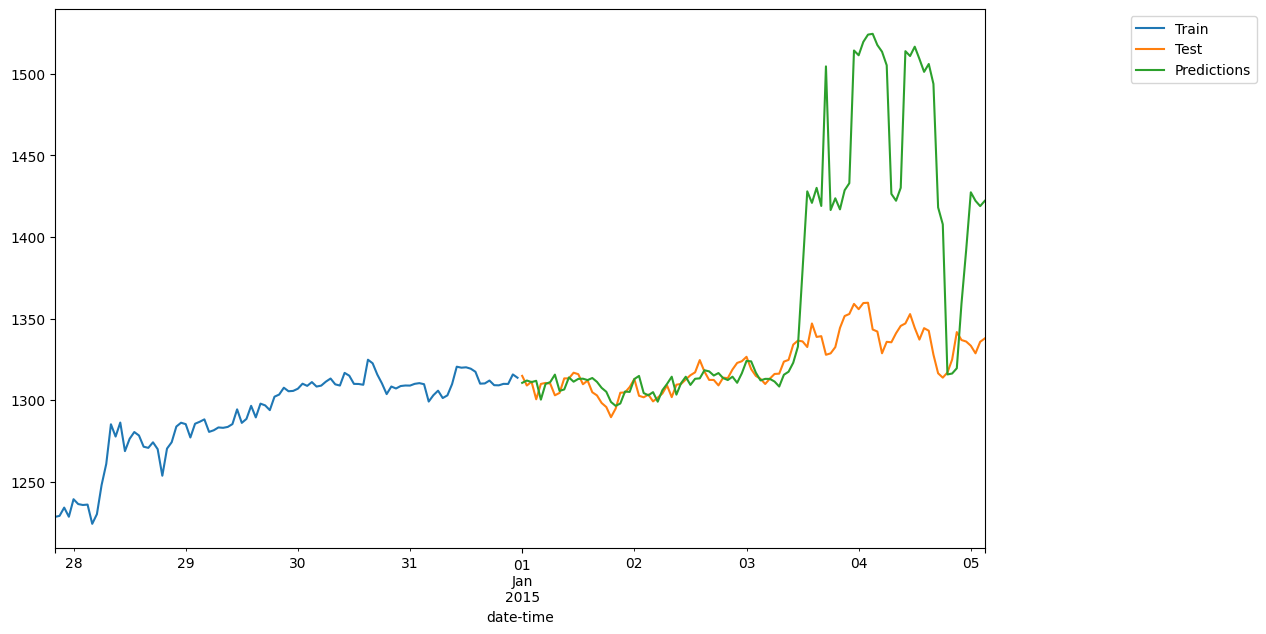

In [177]:
fig, ax = plt.subplots(figsize=(12, 7))

y_train_ind[-100:].plot(ax=ax, label='Train')
y_test_ind[:100].plot(ax=ax, label='Test')
y_pred_ind.iloc[:100].plot(ax=ax, label='Predictions')
ax.legend(bbox_to_anchor=(1.3, 1.0))

#### <font color = 'purple'> Build a Time Series Model using the total energy consumption dataset - data_clean

In [178]:
data_clean

,operations,industrial,total_energy
date-time,,,
2002-01-02 00:00:00,6919.366092,2174.633908,9094.000000
2002-01-02 01:00:00,7165.974188,2170.025812,9336.000000
2002-01-02 02:00:00,6406.542994,2167.457006,8574.000000
2002-01-02 03:00:00,5815.537828,2156.462172,7972.000000
2002-01-02 04:00:00,5497.732922,2162.267078,7660.000000
...,...,...,...
2015-03-02 19:00:00,9277.925921,2266.178077,11544.103998
2015-03-02 20:00:00,9277.925921,2266.178077,11544.103998
2015-03-02 21:00:00,9277.925921,2266.178077,11544.103998


###### <font color = 'red'> Select needed column

In [179]:
df_total_energy = data_clean[['total_energy']]
df_total_energy

,total_energy
date-time,
2002-01-02 00:00:00,9094.000000
2002-01-02 01:00:00,9336.000000
2002-01-02 02:00:00,8574.000000
2002-01-02 03:00:00,7972.000000
2002-01-02 04:00:00,7660.000000
...,...
2015-03-02 19:00:00,11544.103998
2015-03-02 20:00:00,11544.103998
2015-03-02 21:00:00,11544.103998


###### <font color = 'red'> Time Shifting and Features generation

###### <font color = 'violet'> Hourly Time Shifting

In [180]:
lag = '1h'
df_total_energy[f"y_lag{lag}"] = df_total_energy.total_energy.shift(freq=lag)

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_4280\3351777203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_energy[f"y_lag{lag}"] = df_total_energy.total_energy.shift(freq=lag)


In [181]:
df_total_energy

,total_energy,y_lag1h
date-time,,
2002-01-02 00:00:00,9094.000000,NaN
2002-01-02 01:00:00,9336.000000,9094.000000
2002-01-02 02:00:00,8574.000000,9336.000000
2002-01-02 03:00:00,7972.000000,8574.000000
2002-01-02 04:00:00,7660.000000,7972.000000
...,...,...
2015-03-02 19:00:00,11544.103998,11544.103998
2015-03-02 20:00:00,11544.103998,11544.103998
2015-03-02 21:00:00,11544.103998,11544.103998


###### <font color = 'violet'> Daily time shifting

In [182]:
lag = '24h'
df_total_energy[f"y_lag{lag}"] = df_total_energy.total_energy.shift(freq=lag)

###### <font color = 'violet'> Weekly time shifting

In [183]:
lag = '6d'
df_total_energy[f"y_lag{lag}"] = df_total_energy.total_energy.shift(freq=lag)

In [184]:
df_total_energy

,total_energy,y_lag1h,y_lag24h,y_lag6d
date-time,,,,
2002-01-02 00:00:00,9094.000000,NaN,NaN,NaN
2002-01-02 01:00:00,9336.000000,9094.000000,NaN,NaN
2002-01-02 02:00:00,8574.000000,9336.000000,NaN,NaN
2002-01-02 03:00:00,7972.000000,8574.000000,NaN,NaN
2002-01-02 04:00:00,7660.000000,7972.000000,NaN,NaN
...,...,...,...,...
2015-03-02 19:00:00,11544.103998,11544.103998,10958.0,11355.0
2015-03-02 20:00:00,11544.103998,11544.103998,10249.0,10817.0
2015-03-02 21:00:00,11544.103998,11544.103998,9684.0,9913.0


###### <font color = 'red'> Rolling Window or Moving Average

###### <font color = 'violet'> Two_Hour Moving Average

In [185]:
lag = '1h'
window_size = 2
mv_avg_2hr_total = df_total_energy.total_energy.rolling(window=window_size).agg(['mean','std']).shift(freq=lag)
mv_avg_2hr_total

,mean,std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,9215.000000,171.119841
2002-01-02 03:00:00,8955.000000,538.815367
2002-01-02 04:00:00,8273.000000,425.678282
2002-01-02 05:00:00,7816.000000,220.617316
...,...,...
2015-03-02 20:00:00,11544.103998,0.000000
2015-03-02 21:00:00,11544.103998,0.000000
2015-03-02 22:00:00,11544.103998,0.000000


In [186]:
mv_avg_2hr_total = mv_avg_2hr_total.add_prefix('mv_avg_2hr_')
mv_avg_2hr_total

,mv_avg_2hr_mean,mv_avg_2hr_std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,9215.000000,171.119841
2002-01-02 03:00:00,8955.000000,538.815367
2002-01-02 04:00:00,8273.000000,425.678282
2002-01-02 05:00:00,7816.000000,220.617316
...,...,...
2015-03-02 20:00:00,11544.103998,0.000000
2015-03-02 21:00:00,11544.103998,0.000000
2015-03-02 22:00:00,11544.103998,0.000000


###### <font color = 'violet'> 24hours Moving Average

In [187]:
lag = '1h'
window_size = 24
mv_avg_24hr_total = df_total_energy.total_energy.rolling(window=window_size).agg(['mean','std']).shift(freq=lag)
mv_avg_24hr_total = mv_avg_24hr_total.add_prefix('mv_avg_24hr_')
mv_avg_24hr_total

,mv_avg_24hr_mean,mv_avg_24hr_std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,NaN,NaN
2002-01-02 04:00:00,NaN,NaN
2002-01-02 05:00:00,NaN,NaN
...,...,...
2015-03-02 20:00:00,11258.253331,663.434228
2015-03-02 21:00:00,11312.215998,629.581140
2015-03-02 22:00:00,11389.720331,526.476559


###### <font color = 'violet'> Merge all the statistical and other features

In [188]:
df_total = pd.concat([df_total_energy, mv_avg_2hr_total, mv_avg_24hr_total], axis=1)
df_total

,total_energy,y_lag1h,y_lag24h,y_lag6d,mv_avg_2hr_mean,mv_avg_2hr_std,mv_avg_24hr_mean,mv_avg_24hr_std
date-time,,,,,,,,
2002-01-02 00:00:00,9094.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 01:00:00,9336.000000,9094.000000,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 02:00:00,8574.000000,9336.000000,NaN,NaN,9215.000000,171.119841,NaN,NaN
2002-01-02 03:00:00,7972.000000,8574.000000,NaN,NaN,8955.000000,538.815367,NaN,NaN
2002-01-02 04:00:00,7660.000000,7972.000000,NaN,NaN,8273.000000,425.678282,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-03-02 20:00:00,11544.103998,11544.103998,10249.0,10817.0,11544.103998,0.000000,11258.253331,663.434228
2015-03-02 21:00:00,11544.103998,11544.103998,9684.0,9913.0,11544.103998,0.000000,11312.215998,629.581140
2015-03-02 22:00:00,11544.103998,11544.103998,9488.0,9579.0,11544.103998,0.000000,11389.720331,526.476559


###### <font color = 'violet'> Extract all time and date features - optional

In [189]:
df_total['hour'] = df_total.index.hour
df_total['day'] = df_total.index.dayofweek
df_total['month'] = df_total.index.month
df_total['year'] = df_total.index.year

In [190]:
df_total

,total_energy,y_lag1h,y_lag24h,y_lag6d,mv_avg_2hr_mean,mv_avg_2hr_std,mv_avg_24hr_mean,mv_avg_24hr_std,hour,day,month,year
date-time,,,,,,,,,,,,
2002-01-02 00:00:00,9094.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,1,2002
2002-01-02 01:00:00,9336.000000,9094.000000,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1,2002
2002-01-02 02:00:00,8574.000000,9336.000000,NaN,NaN,9215.000000,171.119841,NaN,NaN,2,2,1,2002
2002-01-02 03:00:00,7972.000000,8574.000000,NaN,NaN,8955.000000,538.815367,NaN,NaN,3,2,1,2002
2002-01-02 04:00:00,7660.000000,7972.000000,NaN,NaN,8273.000000,425.678282,NaN,NaN,4,2,1,2002
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-02 20:00:00,11544.103998,11544.103998,10249.0,10817.0,11544.103998,0.000000,11258.253331,663.434228,20,0,3,2015
2015-03-02 21:00:00,11544.103998,11544.103998,9684.0,9913.0,11544.103998,0.000000,11312.215998,629.581140,21,0,3,2015
2015-03-02 22:00:00,11544.103998,11544.103998,9488.0,9579.0,11544.103998,0.000000,11389.720331,526.476559,22,0,3,2015


In [191]:
df_total.isnull().sum()

total_energy          1
y_lag1h               2
y_lag24h             25
y_lag6d             145
mv_avg_2hr_mean       2
mv_avg_2hr_std        2
mv_avg_24hr_mean     24
mv_avg_24hr_std      24
hour                  0
day                   0
month                 0
year                  0
dtype: int64

###### <font color = 'violet'> Remove all missing values

In [192]:
df_total_clean = df_total.copy()

In [193]:
df_total_clean.dropna(inplace=True)

In [194]:
df_total_clean.isnull().sum()

total_energy        0
y_lag1h             0
y_lag24h            0
y_lag6d             0
mv_avg_2hr_mean     0
mv_avg_2hr_std      0
mv_avg_24hr_mean    0
mv_avg_24hr_std     0
hour                0
day                 0
month               0
year                0
dtype: int64

###### <font color = 'red'> Normalize or Standard the dataset and check performance - To be done

###### <font color = 'violet'> Select Features X and Target y

In [195]:
X = df_total_clean.drop(columns=['total_energy'])
y = df_total_clean['total_energy']

###### <font color = 'violet'> Split selected features and target into train and test sets

In [196]:
end_pt = '2014-12-31 23:59:59'

X_train_total = X.loc[ : end_pt]
X_test_total = X.loc[end_pt : ]

y_train_total = y.loc[ : end_pt]
y_test_total = y.loc[end_pt : ]

###### <font color = 'violet'> Train the Model for Total energy Consumed

In [197]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [198]:
num_estimator = 10
seed = 9

In [199]:
model_rf_total = RandomForestRegressor(n_estimators=num_estimator, random_state=seed)
model_rf_total

RandomForestRegressor(n_estimators=10, random_state=9)

In [200]:
model_rf_total.fit(X_train_total, y_train_total)

RandomForestRegressor(n_estimators=10, random_state=9)

###### <font color = 'violet'> Make Predictions with the model

In [201]:
y_pred_total = model_rf_total.predict(X_test_total)
y_pred_total

array([ 8857.4,  8504.1,  7869.1, ..., 10757.1, 10736.9, 11303.6])

###### <font color = 'violet'> Evaluate the Performance of the Trained Model

In [202]:
mse = mean_squared_error(y_test_total, y_pred_total)
print(f"mean_squared_error_rf_total is: {mse}")

rmse = np.sqrt(mse)
print(f"root_mean_squared_error_rf_total is: {rmse}")

r2 = r2_score(y_test_total, y_pred_total)
print(f"coefficient_of_determination for rf_total is: {r2}")

mean_squared_error_rf_total is: 42186.23780113004
root_mean_squared_error_rf_total is: 205.39288644237425
coefficient_of_determination for rf_total is: 0.987003521349636


###### <font color = 'violet'> Convert the predicted to the dataframe

In [203]:
y_pred_total = pd.Series(y_pred_total, index=y_test_total.index)
y_pred_total

date-time
2015-01-01 00:00:00     8857.4
2015-01-01 01:00:00     8504.1
2015-01-01 02:00:00     7869.1
2015-01-01 03:00:00     7770.3
2015-01-01 04:00:00     7741.5
                        ...   
2015-03-02 19:00:00    11131.2
2015-03-02 20:00:00    11125.2
2015-03-02 21:00:00    10757.1
2015-03-02 22:00:00    10736.9
2015-03-02 23:00:00    11303.6
Freq: h, Length: 1464, dtype: float64

In [204]:
y_test_total

date-time
2015-01-01 00:00:00     8881.000000
2015-01-01 01:00:00     8294.000000
2015-01-01 02:00:00     7869.000000
2015-01-01 03:00:00     7704.000000
2015-01-01 04:00:00     7924.000000
                           ...     
2015-03-02 19:00:00    11544.103998
2015-03-02 20:00:00    11544.103998
2015-03-02 21:00:00    11544.103998
2015-03-02 22:00:00    11544.103998
2015-03-02 23:00:00    11544.103998
Freq: h, Name: total_energy, Length: 1464, dtype: float64

###### <font color = 'violet'> Visualization of Training and Testing dataset

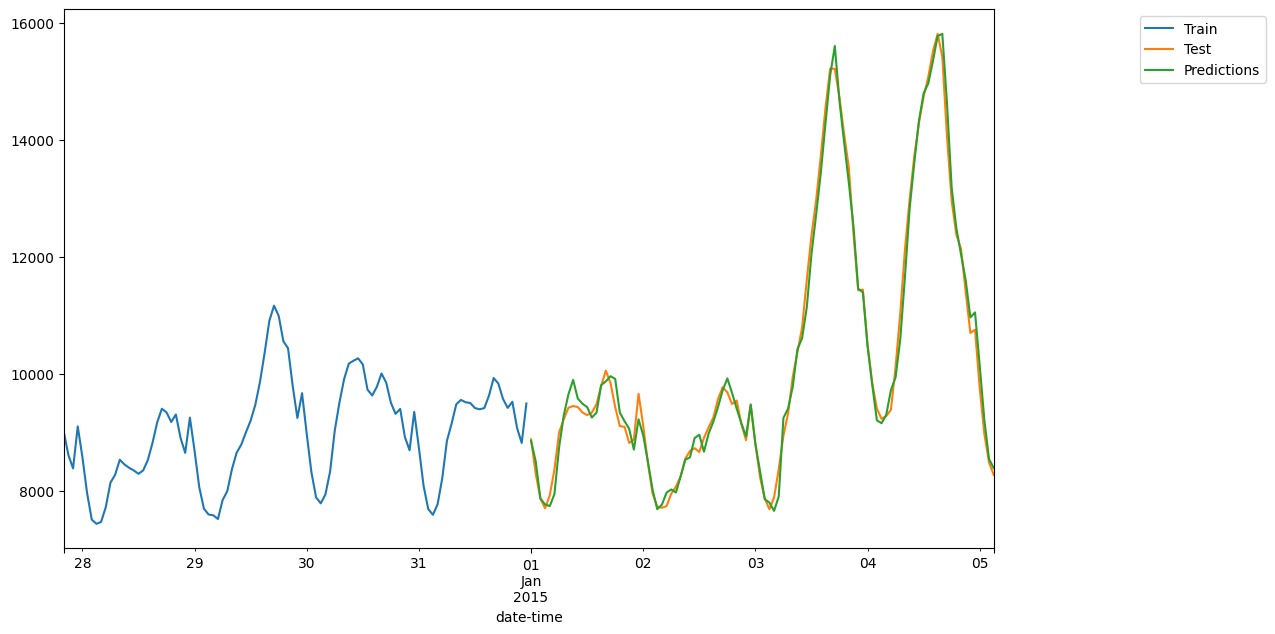

In [205]:
fig, ax = plt.subplots(figsize=(12, 7))

y_train_total[-100:].plot(ax=ax, label='Train')
y_test_total[:100].plot(ax=ax, label='Test')
y_pred_total.iloc[:100].plot(ax=ax, label='Predictions')
ax.legend(bbox_to_anchor=(1.3, 1.0))
plt.show()

###### <font color = 'violet'> Saving the Model for Total Energy Consumed

In [206]:
main_dir = main
model = model_rf_total
path = 'models'
save_model_name = 'model_rf_total_energy_consumption_time_series'
ext = '.pk'
ol.saving_model_versions(main_dir, model, path, save_model_name, ext)

The model is model_rf_total_energy_consumption_time_series and is saved in the models folder


### <font color = 'purple'> Forecasting into the Future using the total energy - For the purpose of case study

Forecasting known entities over time is a time series problems and are useful in `finance`, `manufacturing`, `sales`, `inventory`, `pharmacautical` etc.

###### <font color = 'red'> Difference between time series data and normal matrix or tabular data

Time series data are data that track a given entity over time and this entity are not randomized.

Time series data has entity constant but what changes is time and the properties of the entity over time. E.g. If I visited a particular market at any given time and collect the demorgraphic information such as `age`, `heights` etc of the people that visit the market which are randomly selected and I repeat this process over time at that same market, the data generated here can be classified as `time series data` especially when the purpose of collection is to measure the demographics of people visiting the market over time though the collection was random but it is still `time series data`. So, to know if a dataset is time series or not, it largely depends on the use case.

###### <font color = 'green'> Operational forecasting, Industrial forecasting and Organizational forecasting of energy consumption

In [212]:
df_total_clean

,total_energy,y_lag1h,y_lag24h,y_lag6d,mv_avg_2hr_mean,mv_avg_2hr_std,mv_avg_24hr_mean,mv_avg_24hr_std,hour,day,month,year
date-time,,,,,,,,,,,,
2002-01-08 00:00:00,9096.000000,9582.000000,9122.0,9094.0,9371.000000,298.399062,9500.916667,863.982081,0,1,1,2002
2002-01-08 01:00:00,9554.000000,9096.000000,9484.0,9336.0,9339.000000,343.653896,9499.833333,864.494005,1,1,1,2002
2002-01-08 02:00:00,8912.000000,9554.000000,8842.0,8574.0,9325.000000,323.854906,9502.750000,864.556345,2,1,1,2002
2002-01-08 03:00:00,8514.000000,8912.000000,8320.0,7972.0,9233.000000,453.962554,9505.666667,862.345571,3,1,1,2002
2002-01-08 04:00:00,8502.000000,8514.000000,8084.0,7660.0,8713.000000,281.428499,9513.750000,851.590494,4,1,1,2002
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-02 19:00:00,11544.103998,11544.103998,10958.0,11355.0,11544.103998,0.000000,11233.832331,663.241795,19,0,3,2015
2015-03-02 20:00:00,11544.103998,11544.103998,10249.0,10817.0,11544.103998,0.000000,11258.253331,663.434228,20,0,3,2015
2015-03-02 21:00:00,11544.103998,11544.103998,9684.0,9913.0,11544.103998,0.000000,11312.215998,629.581140,21,0,3,2015


In [211]:
model_rf_total

RandomForestRegressor(n_estimators=10, random_state=9)

###### `Time Series`
If Linear Relationship exist between what is been measure and time - the approach above works most of the time.

Multiple features such as consumer demographics, income features, competitor factors, type of transformers used to push out the energy, which plant is generating the energy etc are involve in the forecasting a simple algorithmic models may not be enough to generate relationships in the data. Therefore, we would use a stronger tool to perform the analysis.

Sophisticated tools like: `ARIMA`, `LongTermShortTermMemoryModel - LSTM`, `Facebook Prophet`, `Convolutional Neural Network`. No model beat `CNN` so if you can get to a point where you can build `CNN` models especially for large dataset, then you are guarantee of higher performance.

###### <font color = 'red'> To forecast into the future using the model will built from our `simple algorithmic model`, we would need to find a way of generating the features into the future because all the features were engineered by us. In this case of `total_energy`, we have engineered the following features - `['y_lag1h'	'y_lag24h'	'y_lag6d'	'mv_avg_2hr_mean'	'mv_avg_2hr_std'	'mv_avg_24hr_mean'	'mv_avg_24hr_std'	'hour'	'day'	'month'	'year']` with the target as `total_energy`. one way is to build model that will predict for any of the engineered columns.

In [216]:
df_total_clean.head()

,total_energy,y_lag1h,y_lag24h,y_lag6d,mv_avg_2hr_mean,mv_avg_2hr_std,mv_avg_24hr_mean,mv_avg_24hr_std,hour,day,month,year
date-time,,,,,,,,,,,,
2002-01-08 00:00:00,9096.0,9582.0,9122.0,9094.0,9371.0,298.399062,9500.916667,863.982081,0,1,1,2002
2002-01-08 01:00:00,9554.0,9096.0,9484.0,9336.0,9339.0,343.653896,9499.833333,864.494005,1,1,1,2002
2002-01-08 02:00:00,8912.0,9554.0,8842.0,8574.0,9325.0,323.854906,9502.750000,864.556345,2,1,1,2002
2002-01-08 03:00:00,8514.0,8912.0,8320.0,7972.0,9233.0,453.962554,9505.666667,862.345571,3,1,1,2002
2002-01-08 04:00:00,8502.0,8514.0,8084.0,7660.0,8713.0,281.428499,9513.750000,851.590494,4,1,1,2002


In [217]:
X_fut = df_total_clean.drop(columns=['total_energy'])
y_fut = df_total_clean['total_energy']

In [ ]:
end_pt = '2014-12-31 23:59:59'

X_train_total_fut = X_fut.loc[:end_pt]
X_test_total_fut = X_fut.loc[end_pt:]

y_train_total_fut = y_fut.loc[:end_pt]
y_test_total_fut = y_fut.loc[end_pt:]

#### Using the X_train_total_fut data to build model that can predict each of the engineered features into the future

In [223]:
X_train_total_fut.head()

,y_lag1h,y_lag24h,y_lag6d,mv_avg_2hr_mean,mv_avg_2hr_std,mv_avg_24hr_mean,mv_avg_24hr_std,hour,day,month,year
date-time,,,,,,,,,,,
2002-01-08 00:00:00,9582.0,9122.0,9094.0,9371.0,298.399062,9500.916667,863.982081,0,1,1,2002
2002-01-08 01:00:00,9096.0,9484.0,9336.0,9339.0,343.653896,9499.833333,864.494005,1,1,1,2002
2002-01-08 02:00:00,9554.0,8842.0,8574.0,9325.0,323.854906,9502.750000,864.556345,2,1,1,2002
2002-01-08 03:00:00,8912.0,8320.0,7972.0,9233.0,453.962554,9505.666667,862.345571,3,1,1,2002
2002-01-08 04:00:00,8514.0,8084.0,7660.0,8713.0,281.428499,9513.750000,851.590494,4,1,1,2002


Here, we focus mainly on the train data and select column(s) of interest and use these selected column(s) to build a model that can predict each engineered columns into the future. For simplicity, we would be selecting the time formatted columns - `hour`, `day`, `month`, `year`. The choice of this is simply because,they were generated from the date and not depending on either lag or window values.

###### Select the columns of interest

In [225]:
X_train_fut = X_train_total_fut[['y_lag1h', 'hour', 'day', 'month', 'year']]
X_train_fut

,y_lag1h,hour,day,month,year
date-time,,,,,
2002-01-08 00:00:00,9582.0,0,1,1,2002
2002-01-08 01:00:00,9096.0,1,1,1,2002
2002-01-08 02:00:00,9554.0,2,1,1,2002
2002-01-08 03:00:00,8912.0,3,1,1,2002
2002-01-08 04:00:00,8514.0,4,1,1,2002
...,...,...,...,...,...
2014-12-31 19:00:00,9573.0,19,2,12,2014
2014-12-31 20:00:00,9420.0,20,2,12,2014
2014-12-31 21:00:00,9524.0,21,2,12,2014


###### Standardize the dataset

###### Select the features and target

In [227]:
Xf = X_train_fut.drop(columns=['y_lag1h'])
Xf.head()

,hour,day,month,year
date-time,,,,
2002-01-08 00:00:00,0,1,1,2002
2002-01-08 01:00:00,1,1,1,2002
2002-01-08 02:00:00,2,1,1,2002
2002-01-08 03:00:00,3,1,1,2002
2002-01-08 04:00:00,4,1,1,2002


In [228]:
yf = X_train_fut['y_lag1h']
yf.head()

date-time
2002-01-08 00:00:00    9582.0
2002-01-08 01:00:00    9096.0
2002-01-08 02:00:00    9554.0
2002-01-08 03:00:00    8912.0
2002-01-08 04:00:00    8514.0
Freq: h, Name: y_lag1h, dtype: float64

###### Split the features and target into train, test

In [239]:
Xf.index.min()

Timestamp('2002-01-08 00:00:00')

In [240]:
Xf.index.max()

Timestamp('2014-12-31 23:00:00')

In [241]:
end_pt = '2013-12-31 23:59:59'

X_trainF = Xf.loc[:end_pt]
X_testF = Xf.loc[end_pt:]

y_trainF = yf.loc[:end_pt]
y_testF = yf.loc[end_pt:]

In [242]:
print(f'length of X_train is {len(X_testF)}')

length of X_train is 8760


##### Build the model

In [243]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [244]:
num_estimator = 10
seed = 9

In [245]:
model_fut = RandomForestRegressor(n_estimators=num_estimator, random_state=seed)
model_fut

RandomForestRegressor(n_estimators=10, random_state=9)

###### Fit the model

In [246]:
model_fut.fit(X_trainF, y_trainF)

RandomForestRegressor(n_estimators=10, random_state=9)

###### Make predictions with the model

In [247]:
y_pred_fut = model_fut.predict(X_testF)
y_pred_fut

array([10760.89714286,  9873.52599206,  9678.70119048, ...,
       11114.91083333, 10631.08035714, 10136.12833333])

###### Convert the predictions to dataframe

In [249]:
y_pred_fut = pd.Series(y_pred_fut, index=y_testF.index)
y_pred_fut

date-time
2014-01-01 00:00:00    10760.897143
2014-01-01 01:00:00     9873.525992
2014-01-01 02:00:00     9678.701190
2014-01-01 03:00:00     9107.472619
2014-01-01 04:00:00     8918.899683
                           ...     
2014-12-31 19:00:00    11898.814286
2014-12-31 20:00:00    11503.247381
2014-12-31 21:00:00    11114.910833
2014-12-31 22:00:00    10631.080357
2014-12-31 23:00:00    10136.128333
Freq: h, Length: 8760, dtype: float64

###### Evaluate the Performance of the Model

In [250]:
mse = mean_squared_error(y_testF, y_pred_fut)
print(f"mean_squared_error_rf_total is: {mse}")

rmse = np.sqrt(mse)
print(f"root_mean_squared_error_rf_total is: {rmse}")

r2 = r2_score(y_testF, y_pred_fut)
print(f"coefficient_of_determination for rf_total is: {r2}")

mean_squared_error_rf_total is: 1212151.3934090598
root_mean_squared_error_rf_total is: 1100.9774717990645
coefficient_of_determination for rf_total is: 0.6313907373939013


###### Visualization of the Training and the Testing data

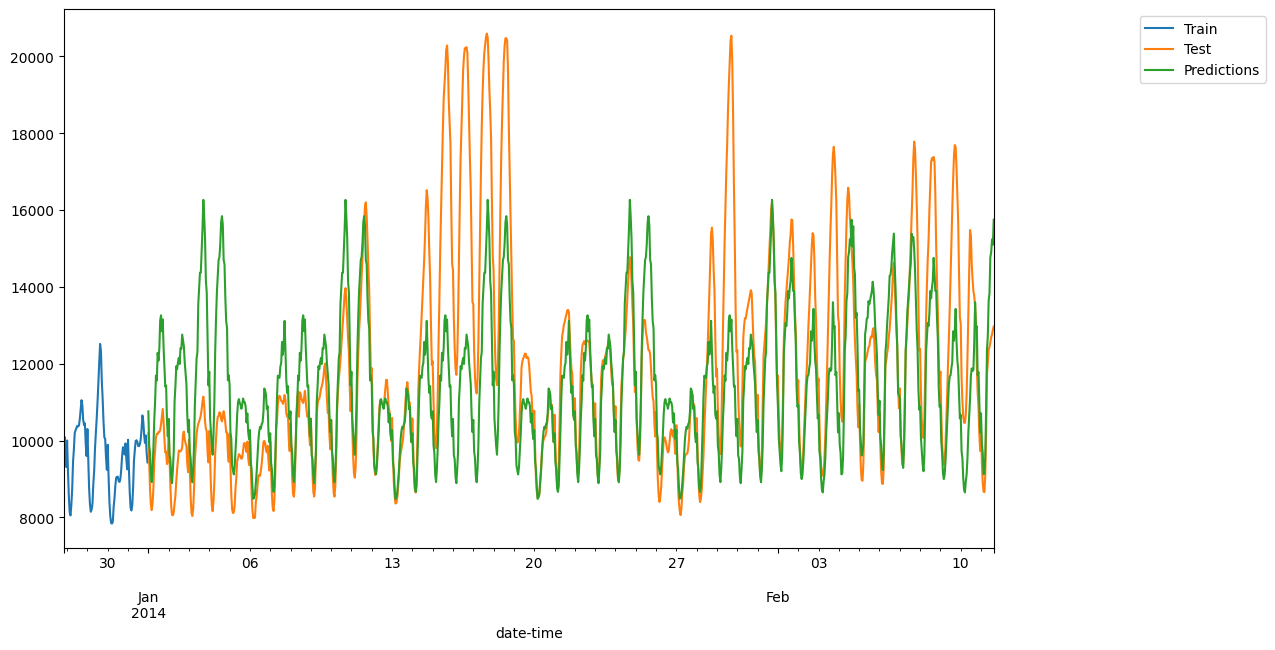

In [253]:
fig, ax = plt.subplots(figsize=(12, 7))

y_trainF[-100:].plot(ax=ax, label='Train')
y_testF[:1000].plot(ax=ax, label='Test')
y_pred_fut.iloc[:1000].plot(ax=ax, label='Predictions')
ax.legend(bbox_to_anchor=(1.3, 1.0))
plt.show()

##### `Note Please`
Now that we have built a model that can predict the `y_lag1h` for the input features of `hour`, `day`, `month` and `year`, the ideal thing to do is now to synthesis the input features into the future and then use the built model for `y_lag1h` to predict the future values and repeat this for each of the features in the data. You can then concatenate all the predicted and the synthetic dataset into the future and use the primary model that we built for the total energy to predict the total energy consumption into the future using the time factor.

These seems to be time taken and rigorous, so we would built a function that can achieve this for us at once.

#### Let us try to build the function using the original Features from the dataset

In [413]:
X_fut

,y_lag1h,y_lag24h,y_lag6d,mv_avg_2hr_mean,mv_avg_2hr_std,mv_avg_24hr_mean,mv_avg_24hr_std,hour,day,month,year
date-time,,,,,,,,,,,
2002-01-08 00:00:00,9582.000000,9122.0,9094.0,9371.000000,298.399062,9500.916667,863.982081,0,1,1,2002
2002-01-08 01:00:00,9096.000000,9484.0,9336.0,9339.000000,343.653896,9499.833333,864.494005,1,1,1,2002
2002-01-08 02:00:00,9554.000000,8842.0,8574.0,9325.000000,323.854906,9502.750000,864.556345,2,1,1,2002
2002-01-08 03:00:00,8912.000000,8320.0,7972.0,9233.000000,453.962554,9505.666667,862.345571,3,1,1,2002
2002-01-08 04:00:00,8514.000000,8084.0,7660.0,8713.000000,281.428499,9513.750000,851.590494,4,1,1,2002
...,...,...,...,...,...,...,...,...,...,...,...
2015-03-02 19:00:00,11544.103998,10958.0,11355.0,11544.103998,0.000000,11233.832331,663.241795,19,0,3,2015
2015-03-02 20:00:00,11544.103998,10249.0,10817.0,11544.103998,0.000000,11258.253331,663.434228,20,0,3,2015
2015-03-02 21:00:00,11544.103998,9684.0,9913.0,11544.103998,0.000000,11312.215998,629.581140,21,0,3,2015


In [414]:
X_fut.columns

Index(['y_lag1h', 'y_lag24h', 'y_lag6d', 'mv_avg_2hr_mean', 'mv_avg_2hr_std',
       'mv_avg_24hr_mean', 'mv_avg_24hr_std', 'hour', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
# Columns to synthesis

In [415]:
ref_cols = ['y_lag1h', 'y_lag24h', 'y_lag6d', 'mv_avg_2hr_mean', 'mv_avg_2hr_std',
       'mv_avg_24hr_mean', 'mv_avg_24hr_std']

In [258]:
# Columns as the inputs

In [416]:
inp_cols = ['hour', 'day', 'month', 'year']

In [260]:
##### Function that select features and target from the time series data to be use to forecast into the future

In [417]:
def feat_tar_slector_tsfuture(df, tgt_col):
    features = df.drop(columns=[tgt_col])
    target = df[tgt_col]
    return features, target  

In [418]:
df = df_total_clean
tgt_col = 'total_energy'
X, y = feat_tar_slector_tsfuture(df, tgt_col)

In [292]:
# Function that split features into train and test

In [419]:
def split(features, cut_off):
    train = features.loc[:cut_off]
    test = features.loc[cut_off:]
    return train, test

In [420]:
features = X
cut_off = '2013-12-31 23:59:59'
train, test = split(features, cut_off)

In [423]:
train.head()
train.shape

(105024, 11)

In [424]:
test.head()
test.shape

(10224, 11)

In [502]:
def feature_forecaster(col, model_name, x_train, y_train, x_test, y_test, fut_vars):
    model_name.fit(x_train, y_train)
    y_pred = model_name.predict(fut_vars)
    #mse = mean_squared_error(y_pred, y_test)
    #rmse = np.sqrt(mse)
    y_pred_df = pd.Series(y_pred)  #, index=x_test.index)

    return col, y_pred   #rmse


def fut_forecast_generator(startPeriod, num_period_in_hrs):
    max_date = startPeriod  #'2015-03-02 23:00:00'
    start_date = pd.to_datetime(max_date)
    num_of_hrs_into_future = num_period_in_hrs #500
    date_seq = pd.date_range(start_date, periods=num_of_hrs_into_future, freq='h')
    dfx = pd.DataFrame(date_seq, columns=['date'])
    dfx = dfx.set_index('date')
    dfx['hour'] = dfx.index.hour
    dfx['day'] = dfx.index.dayofweek
    dfx['month'] = dfx.index.month
    dfx['year'] = dfx.index.year
    fut_vars = dfx
    return fut_vars 

In [503]:
num_estimator = 10
seed = 9
model_name = RandomForestRegressor(n_estimators=num_estimator, random_state=seed)

In [517]:
def fut_fcast_preprocessing(train, test, syn_cols, pos_input_cols, startPeriod, num_period_in_hrs):
    df_dict = {}
    output_dict = {}
    for col in syn_cols:
        idx = syn_cols.index(col)
        x_train = train.values[:, pos_input_cols:]
        y_train = train.values[:, idx]

        x_test = test.values[:, pos_input_cols:]
        y_test = test.values[:, idx]

        res = {'x_train':x_train, 'y_train':y_train, 'x_test':x_test, 'y_test':y_test}
        df_dict[col] = res

    for key, value in df_dict.items():
        col = key
        x_train, y_train, x_test, y_test = list(value.values())
        #print(col, x_train, y_train, x_test, y_test)

        fut_vars = fut_forecast_generator(startPeriod, num_period_in_hrs)
        
        col, preds = feature_forecaster(col, model_name, x_train, y_train, x_test, y_test, fut_vars)

        output_dict[col] = preds
        output_dict_df = pd.DataFrame(output_dict)
    return output_dict_df, fut_vars    #rmse
        
        #print('++++++++++++++++++++++++++++++++++++++++')

In [518]:
startPeriod = '2015-03-02 23:00:00'
num_period_in_hrs = 500
train = train
test = test
syn_cols = ref_cols
pos_input_cols = 7
output_dict_df, fut_vars = fut_fcast_preprocessing(train, test, syn_cols, pos_input_cols, startPeriod, num_period_in_hrs)   #, rmse

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.w

In [513]:
output_dict_df

,y_lag1h,y_lag24h,y_lag6d,mv_avg_2hr_mean,mv_avg_2hr_std,mv_avg_24hr_mean,mv_avg_24hr_std
0,10231.306667,10679.896667,11103.043333,10447.533333,312.614265,10674.794028,1223.841583
1,10501.805000,9756.491667,10269.793333,10346.335833,230.176221,10527.854028,1170.016540
2,9674.142857,9306.119048,10091.349405,10040.006845,517.409814,10304.445957,1092.798010
3,9477.152381,9000.590476,9579.409524,9616.995238,197.767665,10497.209722,1138.121647
4,9118.841667,8830.641667,9543.250000,9318.245833,282.000077,10652.523958,1205.467499
...,...,...,...,...,...,...,...
495,10947.096667,11299.533333,15387.860000,10924.696667,118.732657,10283.723889,1047.385236
496,11865.891429,12579.197857,15973.460476,11792.787262,103.384904,10785.198135,1318.320683
497,11507.747381,12019.848810,15515.480000,11397.168929,156.381547,10414.755714,1104.939328
498,11635.205714,11681.299048,14758.742857,11478.689048,224.095608,10285.003095,1033.934610


In [514]:
fut_vars

,hour,day,month,year
date,,,,
2015-03-02 23:00:00,23,0,3,2015
2015-03-03 00:00:00,0,1,3,2015
2015-03-03 01:00:00,1,1,3,2015
2015-03-03 02:00:00,2,1,3,2015
2015-03-03 03:00:00,3,1,3,2015
...,...,...,...,...
2015-03-23 14:00:00,14,0,3,2015
2015-03-23 15:00:00,15,0,3,2015
2015-03-23 16:00:00,16,0,3,2015


In [515]:
fut_vars = fut_vars.reset_index(drop=True)
fut_vars

,hour,day,month,year
0,23,0,3,2015
1,0,1,3,2015
2,1,1,3,2015
3,2,1,3,2015
4,3,1,3,2015
...,...,...,...,...
495,14,0,3,2015
496,15,0,3,2015
497,16,0,3,2015
498,17,0,3,2015


###### Concatenate to have the full dataframe

In [516]:
full_df_fut = pd.concat([output_dict_df, fut_vars], axis=1)
full_df_fut

,y_lag1h,y_lag24h,y_lag6d,mv_avg_2hr_mean,mv_avg_2hr_std,mv_avg_24hr_mean,mv_avg_24hr_std,hour,day,month,year
0,10231.306667,10679.896667,11103.043333,10447.533333,312.614265,10674.794028,1223.841583,23,0,3,2015
1,10501.805000,9756.491667,10269.793333,10346.335833,230.176221,10527.854028,1170.016540,0,1,3,2015
2,9674.142857,9306.119048,10091.349405,10040.006845,517.409814,10304.445957,1092.798010,1,1,3,2015
3,9477.152381,9000.590476,9579.409524,9616.995238,197.767665,10497.209722,1138.121647,2,1,3,2015
4,9118.841667,8830.641667,9543.250000,9318.245833,282.000077,10652.523958,1205.467499,3,1,3,2015
...,...,...,...,...,...,...,...,...,...,...,...
495,10947.096667,11299.533333,15387.860000,10924.696667,118.732657,10283.723889,1047.385236,14,0,3,2015
496,11865.891429,12579.197857,15973.460476,11792.787262,103.384904,10785.198135,1318.320683,15,0,3,2015
497,11507.747381,12019.848810,15515.480000,11397.168929,156.381547,10414.755714,1104.939328,16,0,3,2015
498,11635.205714,11681.299048,14758.742857,11478.689048,224.095608,10285.003095,1033.934610,17,0,3,2015


###### Predictions into the future

In [519]:
model_rf_total

RandomForestRegressor(n_estimators=10, random_state=9)

In [520]:
model_rf_total.predict(full_df_fut)

array([10681.5,  9868.2,  9236.3,  9012.2,  8967.6,  9382.4, 10544.4,
       11933.7, 12972.6, 12286.3, 12514.5, 13067.6, 13601.2, 13526.1,
       14148.8, 14564.7, 14378. , 15015.7, 14881.9, 14181.9, 13395.9,
       13054.9, 11529.3, 10707.6, 11302.4, 10373.3, 10175.8,  9454.7,
        9417.1,  9785. , 10676.5, 12650.1, 13080.5, 13603.4, 13805.9,
       14206.7, 14798.3, 15237.8, 15393.4, 15996.6, 15319. , 16156.5,
       14808.5, 14664.4, 14607.9, 13574.6, 12422.5, 10883.6, 11224.9,
       10639.7,  9881.6,  9778.5,  9640.5, 10091.7, 11261.4, 12877. ,
       13190.3, 13399.9, 14214.2, 14249.3, 14564.5, 13979.5, 14715.2,
       15364.8, 15266.8, 15644.2, 14796.3, 14491.8, 13387.1, 13096.6,
       11902.1, 11132.7, 11332.1, 10301. ,  9772.5,  9411.5,  9164.9,
        9557.9, 10610.4, 12546.9, 12691.1, 13283.5, 13295.9, 13193.5,
       13517.3, 13025.8, 14108.5, 13713. , 12911.1, 13676. , 13424.9,
       12966.9, 12756.2, 12176.1, 11420.6, 10582.9, 10964. , 10120.1,
        9686.7,  921

##### Build the time into the future for the forecast

###### Check the last date in the original dataset

In [445]:
df_total_clean.index.max()

Timestamp('2015-03-02 23:00:00')

In [446]:
max_date = '2015-03-02 23:00:00'

In [447]:
import datetime

In [449]:
start_date = pd.to_datetime(max_date)
start_date

Timestamp('2015-03-02 23:00:00')

###### Generate sequence of date

In [465]:
num_of_hrs_into_future = 500

In [466]:
date_seq = pd.date_range(start_date, periods=num_of_hrs_into_future, freq='h')
date_seq

DatetimeIndex(['2015-03-02 23:00:00', '2015-03-03 00:00:00',
               '2015-03-03 01:00:00', '2015-03-03 02:00:00',
               '2015-03-03 03:00:00', '2015-03-03 04:00:00',
               '2015-03-03 05:00:00', '2015-03-03 06:00:00',
               '2015-03-03 07:00:00', '2015-03-03 08:00:00',
               ...
               '2015-03-23 09:00:00', '2015-03-23 10:00:00',
               '2015-03-23 11:00:00', '2015-03-23 12:00:00',
               '2015-03-23 13:00:00', '2015-03-23 14:00:00',
               '2015-03-23 15:00:00', '2015-03-23 16:00:00',
               '2015-03-23 17:00:00', '2015-03-23 18:00:00'],
              dtype='datetime64[ns]', length=500, freq='h')

##### Extract all the date format

In [472]:
dfx = pd.DataFrame(date_seq, columns=['date'])
dfx

,date
0,2015-03-02 23:00:00
1,2015-03-03 00:00:00
2,2015-03-03 01:00:00
3,2015-03-03 02:00:00
4,2015-03-03 03:00:00
...,...
495,2015-03-23 14:00:00
496,2015-03-23 15:00:00
497,2015-03-23 16:00:00
498,2015-03-23 17:00:00


In [473]:
dfx = dfx.set_index('date')

In [474]:
dfx['hour'] = dfx.index.hour
dfx['day'] = dfx.index.dayofweek
dfx['month'] = dfx.index.month
dfx['year'] = dfx.index.year

In [475]:
dfx

,hour,day,month,year
date,,,,
2015-03-02 23:00:00,23,0,3,2015
2015-03-03 00:00:00,0,1,3,2015
2015-03-03 01:00:00,1,1,3,2015
2015-03-03 02:00:00,2,1,3,2015
2015-03-03 03:00:00,3,1,3,2015
...,...,...,...,...
2015-03-23 14:00:00,14,0,3,2015
2015-03-23 15:00:00,15,0,3,2015
2015-03-23 16:00:00,16,0,3,2015


##### Now we have obtain the hours into the future, we can then call on the model that uses date parameters as input features to predict the futuristic values for the corresponding target variable.

In [476]:
model_fut

RandomForestRegressor(n_estimators=10, random_state=9)

###### 500hours futuristic values for `y_lag1h`

In [477]:
model_fut.predict(dfx)

array([10231.30666667, 10501.805     ,  9674.14285714,  9477.15238095,
        9118.84166667,  8950.56142857,  9302.52166667, 10398.48      ,
       11718.16174603, 12123.93119048, 12289.815     , 12719.86785714,
       13129.36666667, 13364.46833333, 13757.83452381, 14278.16166667,
       14212.96142857, 14725.58888889, 15042.78888889, 14656.645     ,
       14169.37601732, 13523.91571429, 12386.09      , 11509.38666667,
       11157.04666667, 11106.35333333, 10308.97536797,  9916.91357143,
        9567.49310606,  9427.00333333,  9895.36166667, 11136.50833333,
       12716.94277778, 13158.64      , 13402.01916667, 13734.16833333,
       14328.25333333, 14884.92738095, 15033.78238095, 15696.1133658 ,
       15283.33833333, 16063.7825    , 15197.585     , 15446.50083333,
       15187.3       , 14224.08809524, 13628.49      , 11677.47666667,
       11094.97333333, 11402.46380952, 10538.65277778, 10219.225     ,
        9826.93738095,  9766.01      ,  9938.1402381 , 11302.67130952,
      

In [267]:
# Function for preprocessing the features for future forecasting

built as helper function module